<a href="https://colab.research.google.com/github/aayush1324/Scaler_DSML2022/blob/main/OLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Start**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
from scipy.stats import binom , norm , poisson , expon ,geom

In [ ]:
from scipy.stats import ttest_ind , ttest_rel , f_oneway , kruskal
from scipy.stats import norm , chi2 , f
from scipy.stats import chi2_contingency , chisquare
from scipy.stats import pearsonr , spearmanr
from scipy.stats import kstest

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
! wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv" -O ola.csv

--2023-02-28 13:50:08--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 99.86.227.111, 99.86.227.141, 99.86.227.34, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|99.86.227.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1127673 (1.1M) [text/plain]
Saving to: ‘ola.csv’

ola.csv             100%[===================>]   1.08M  --.-KB/s    in 0.02s   

2023-02-28 13:50:08 (68.0 MB/s) - ‘ola.csv’ saved [1127673/1127673]



In [ ]:
df = pd.read_csv("ola.csv")

In [ ]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


# **Drop Columns**

In [ ]:
df = df.drop(["Unnamed: 0"] , axis = 1)

In [ ]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
df1 = df.copy()

# **Observations**

In [ ]:
df.shape

(19104, 13)

In [ ]:
len(df)

19104

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [ ]:
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
df.describe(include = "object")

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


In [ ]:
df.describe(include = "all")

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104,19104.000000,19043.000000,19052.000000,19104,19104.000000,19104.000000,19104,1616,19104.000000,19104.000000,1.910400e+04,19104.000000
unique,24,NaN,NaN,NaN,29,NaN,NaN,869,493,NaN,NaN,NaN,NaN
top,01/01/19,NaN,NaN,NaN,C20,NaN,NaN,23/07/15,29/07/20,NaN,NaN,NaN,NaN
freq,1022,NaN,NaN,NaN,1008,NaN,NaN,192,70,NaN,NaN,NaN,NaN
mean,NaN,1415.591133,34.668435,0.418749,NaN,1.021671,65652.025126,NaN,NaN,1.690536,2.252670,5.716621e+05,2.008899
std,NaN,810.705321,6.257912,0.493367,NaN,0.800167,30914.515344,NaN,NaN,0.836984,1.026512,1.128312e+06,1.009832
min,NaN,1.000000,21.000000,0.000000,NaN,0.000000,10747.000000,NaN,NaN,1.000000,1.000000,-6.000000e+06,1.000000
25%,NaN,710.000000,30.000000,0.000000,NaN,0.000000,42383.000000,NaN,NaN,1.000000,1.000000,0.000000e+00,1.000000
50%,NaN,1417.000000,34.000000,0.000000,NaN,1.000000,60087.000000,NaN,NaN,1.000000,2.000000,2.500000e+05,2.000000
75%,NaN,2137.000000,39.000000,1.000000,NaN,2.000000,83969.000000,NaN,NaN,2.000000,3.000000,6.997000e+05,3.000000


In [ ]:
df.dtypes

MMM-YY                   object
Driver_ID                 int64
Age                     float64
Gender                  float64
City                     object
Education_Level           int64
Income                    int64
Dateofjoining            object
LastWorkingDate          object
Joining Designation       int64
Grade                     int64
Total Business Value      int64
Quarterly Rating          int64
dtype: object

# **Date Time Change**

In [ ]:
df["MMM-YY"] = pd.to_datetime(df["MMM-YY"])

In [ ]:
df["Dateofjoining"] = pd.to_datetime(df["Dateofjoining"])

In [ ]:
df["LastWorkingDate"] = pd.to_datetime(df["LastWorkingDate"])

In [ ]:
df.dtypes

MMM-YY                  datetime64[ns]
Driver_ID                        int64
Age                            float64
Gender                         float64
City                            object
Education_Level                  int64
Income                           int64
Dateofjoining           datetime64[ns]
LastWorkingDate         datetime64[ns]
Joining Designation              int64
Grade                            int64
Total Business Value             int64
Quarterly Rating                 int64
dtype: object

# **Object Columns**

In [ ]:
cat_col = (df.dtypes == "object")
cat_col = list(cat_col[cat_col].index)
cat_col

['City']

In [ ]:
for cat in cat_col:
  print(cat)
  print(df[cat].nunique())
  print("")

City
29



In [ ]:
for cat in (cat_col):
  print(df[cat].value_counts())
  print("")
  print("")

C20    1008
C29     900
C26     869
C22     809
C27     786
C15     761
C10     744
C12     727
C8      712
C16     709
C28     683
C1      677
C6      660
C5      656
C14     648
C3      637
C24     614
C7      609
C21     603
C25     584
C19     579
C4      578
C13     569
C18     544
C23     538
C9      520
C2      472
C11     468
C17     440
Name: City, dtype: int64




# **DateTime Columns**

In [ ]:
dt_col = (df.dtypes == "datetime64[ns]")
dt_col = list(dt_col[dt_col].index)
dt_col

['MMM-YY', 'Dateofjoining', 'LastWorkingDate']

In [ ]:
for dt in dt_col:
  print(dt)
  print(df[dt].nunique())
  print("")

MMM-YY
24

Dateofjoining
869

LastWorkingDate
493



In [ ]:
for dt in (dt_col):
  print(df[dt].value_counts())
  print("")
  print("")

2019-01-01    1022
2019-02-01     944
2019-03-01     870
2020-12-01     819
2020-10-01     818
2020-08-01     812
2020-09-01     809
2020-07-01     806
2020-11-01     805
2019-12-01     795
2019-04-01     794
2020-01-01     782
2019-11-01     781
2020-06-01     770
2020-05-01     766
2019-05-01     764
2019-09-01     762
2020-02-01     761
2019-07-01     757
2019-08-01     754
2019-10-01     739
2020-04-01     729
2019-06-01     726
2020-03-01     719
Name: MMM-YY, dtype: int64


2015-07-23    192
2020-07-31    150
2019-07-04    146
2016-04-25    134
2015-07-30    118
             ... 
2018-03-16      1
2018-09-26      1
2020-12-27      1
2018-12-29      1
2018-12-16      1
Name: Dateofjoining, Length: 869, dtype: int64


2020-07-29    70
2019-09-22    26
2019-03-17    14
2020-11-28    13
2020-02-17    13
              ..
2019-06-16     1
2020-11-17     1
2020-12-05     1
2019-09-02     1
2020-10-28     1
Name: LastWorkingDate, Length: 493, dtype: int64




# **Numerical Integer Columns**

In [ ]:
num_col = (df.dtypes == "int64" )
num_col = list(num_col[num_col].index)
num_col

['Driver_ID',
 'Education_Level',
 'Income',
 'Joining Designation',
 'Grade',
 'Total Business Value',
 'Quarterly Rating']

In [ ]:
for num in num_col:
  print(num)
  print(df[num].nunique())
  print("")

Driver_ID
2381

Education_Level
3

Income
2383

Joining Designation
5

Grade
5

Total Business Value
10181

Quarterly Rating
4



In [ ]:
for num in (num_col):
  print(df[num].value_counts())
  print("")
  print("")

2110    24
2617    24
1623    24
1642    24
1644    24
        ..
1614     1
445      1
2397     1
1619     1
469      1
Name: Driver_ID, Length: 2381, dtype: int64


1    6864
2    6327
0    5913
Name: Education_Level, dtype: int64


48747     57
109652    32
68356     30
42260     28
67490     28
          ..
44706      1
72186      1
67162      1
22132      1
35091      1
Name: Income, Length: 2383, dtype: int64


1    9831
2    5955
3    2847
4     341
5     130
Name: Joining Designation, dtype: int64


2    6627
1    5202
3    4826
4    2144
5     305
Name: Grade, dtype: int64


0         6499
200000     288
250000     148
500000     131
300000     107
          ... 
130520       1
275330       1
820160       1
203040       1
448370       1
Name: Total Business Value, Length: 10181, dtype: int64


1    7679
2    5553
3    3895
4    1977
Name: Quarterly Rating, dtype: int64




# **Numerical Float Columns**

In [ ]:
num_col = (df.dtypes == "float64" )
num_col = list(num_col[num_col].index)
num_col

['Age', 'Gender']

In [ ]:
for num in num_col:
  print(num)
  print(df[num].nunique())
  print("")

Age
36

Gender
2



In [ ]:
for num in (num_col):
  print(df[num].value_counts())
  print("")
  print("")

36.0    1283
33.0    1250
34.0    1234
30.0    1146
32.0    1143
35.0    1138
31.0    1076
29.0    1013
37.0     862
38.0     854
39.0     788
28.0     772
27.0     744
40.0     701
41.0     661
26.0     566
42.0     478
25.0     449
44.0     407
43.0     399
45.0     371
46.0     350
24.0     274
47.0     224
23.0     193
48.0     144
49.0      99
22.0      92
52.0      78
51.0      72
50.0      69
21.0      35
53.0      26
54.0      24
55.0      21
58.0       7
Name: Age, dtype: int64


0.0    11074
1.0     7978
Name: Gender, dtype: int64




# **Numerical to Categorical Columns**

In [ ]:
df["Education_Level"] = df["Education_Level"].astype("category")

In [ ]:
df["Joining Designation"] = df["Joining Designation"].astype("category")

In [ ]:
df["Grade"] = df["Grade"].astype("category")

In [ ]:
df["Quarterly Rating"] = df["Quarterly Rating"].astype("category")

In [ ]:
df.dtypes

MMM-YY                  datetime64[ns]
Driver_ID                        int64
Age                            float64
Gender                         float64
City                            object
Education_Level               category
Income                           int64
Dateofjoining           datetime64[ns]
LastWorkingDate         datetime64[ns]
Joining Designation           category
Grade                         category
Total Business Value             int64
Quarterly Rating              category
dtype: object

# **Duplicate Value Check**

In [ ]:
df.duplicated().sum()

0

# **Univariate**

In [ ]:
x = df.columns
x

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

### **Object Columns**

In [ ]:
cat_col = (df.dtypes == "object")
cat_col = list(cat_col[cat_col].index)
cat_col

['City']

In [ ]:
c = len(cat_col)
c

1

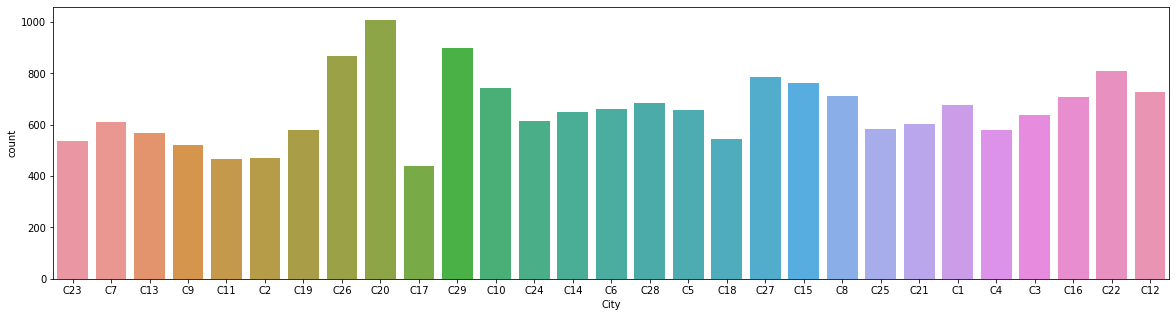


**************************************************



In [ ]:
for i in range (c):

  plt.figure(figsize = (20,5))
  sns.countplot(x=df[cat_col[i]] , data =df)
  plt.show()
  print()
  print("*"*50)
  print()

### **Integer Columns**

In [ ]:
int_col = (df.dtypes == "int64")
int_col = list(int_col[int_col].index)
int_col

['Driver_ID', 'Income', 'Total Business Value']

In [ ]:
n = len(int_col)
n

3

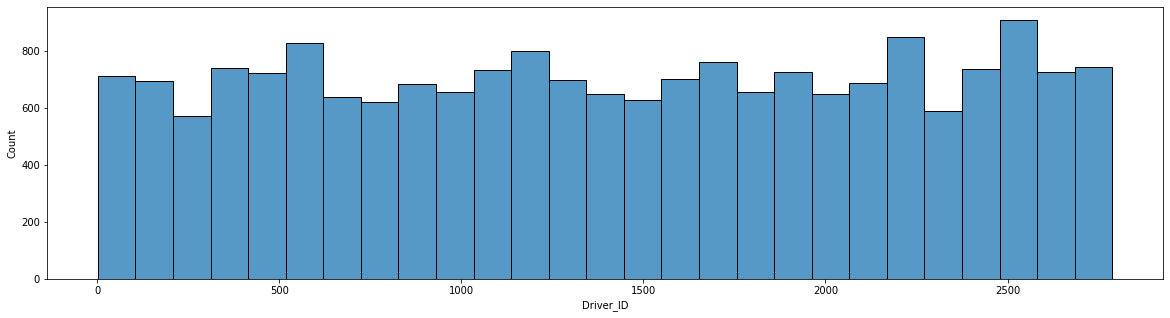


**************************************************



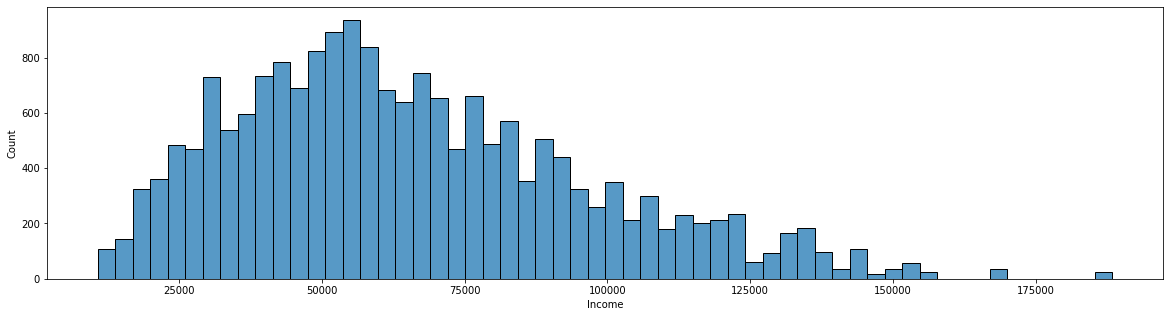


**************************************************



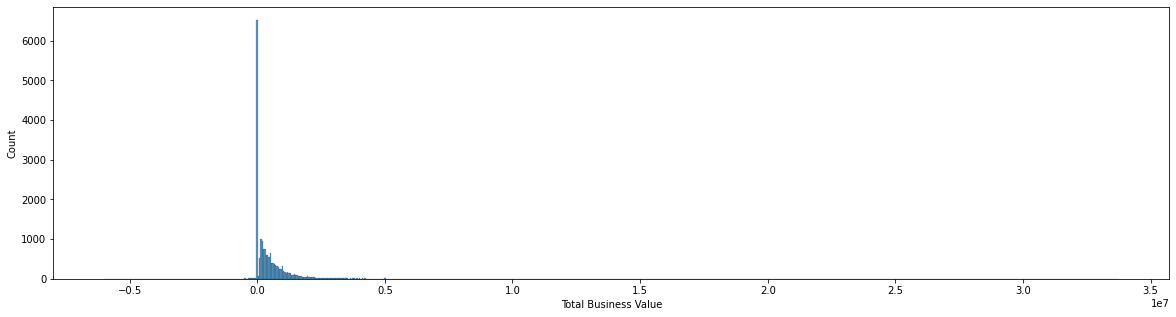


**************************************************



In [ ]:
for i in range (n):

  plt.figure(figsize = (20,5))
  sns.histplot(x=df[int_col[i]] , data =df)
  plt.show()
  print()
  print("*"*50)
  print()

### **Float Columns**

In [ ]:
float_col = (df.dtypes == "float64")
float_col = list(float_col[float_col].index)
float_col

['Age', 'Gender']

In [ ]:
n = len(float_col)
n

2

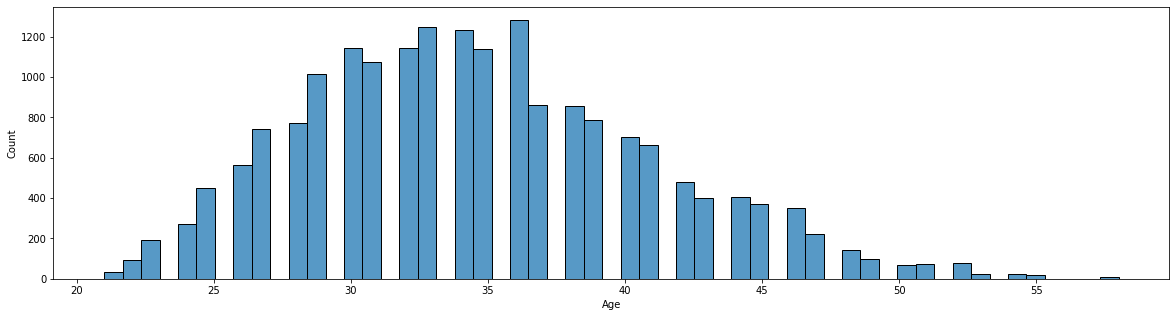


**************************************************



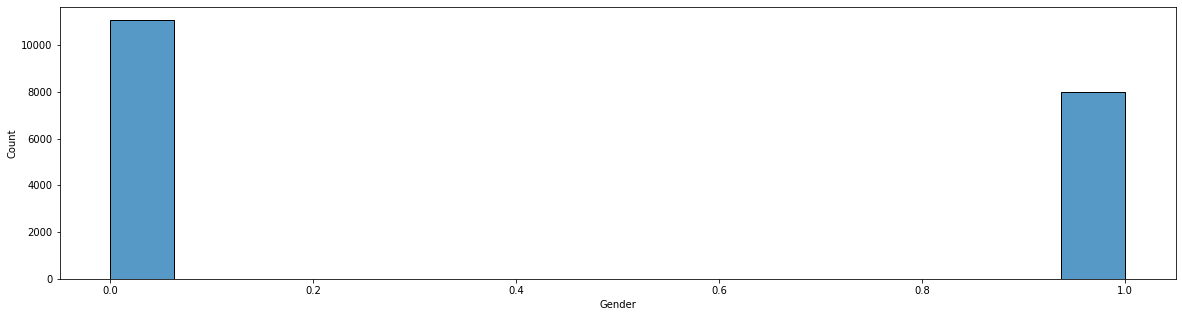


**************************************************



In [ ]:
for i in range (n):

  plt.figure(figsize = (20,5))
  sns.histplot(x=df[float_col[i]] , data =df)
  plt.show()
  print()
  print("*"*50)
  print()

### **Categorical Columns**

In [ ]:
catt_col = (df.dtypes == "category")
catt_col = list(catt_col[catt_col].index)
catt_col

['Education_Level', 'Joining Designation', 'Grade', 'Quarterly Rating']

In [ ]:
n = len(catt_col)
n

4

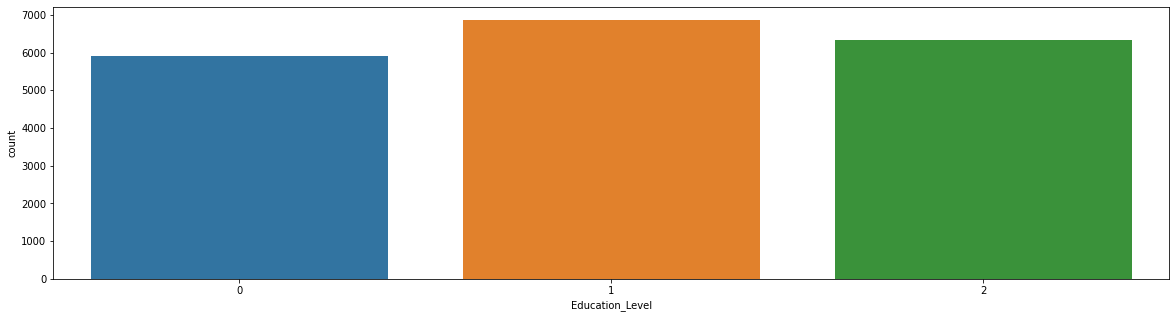


**************************************************



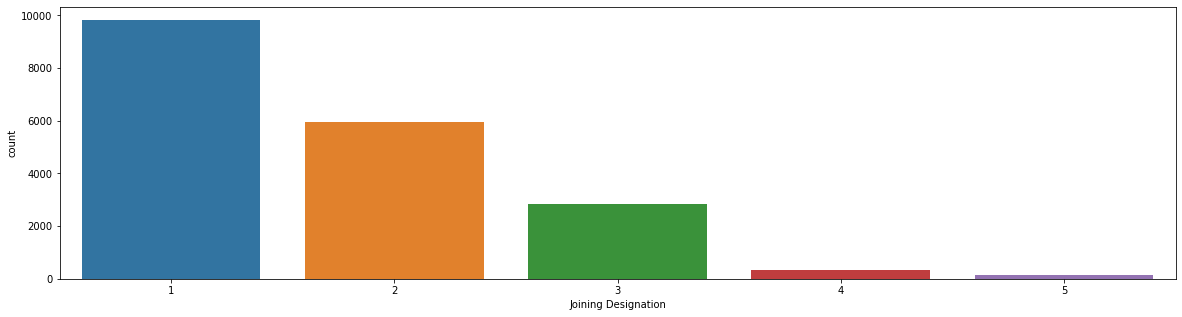


**************************************************



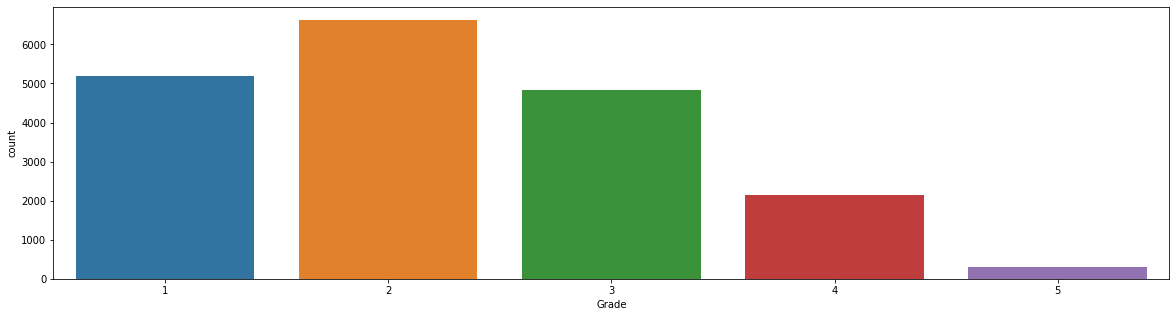


**************************************************



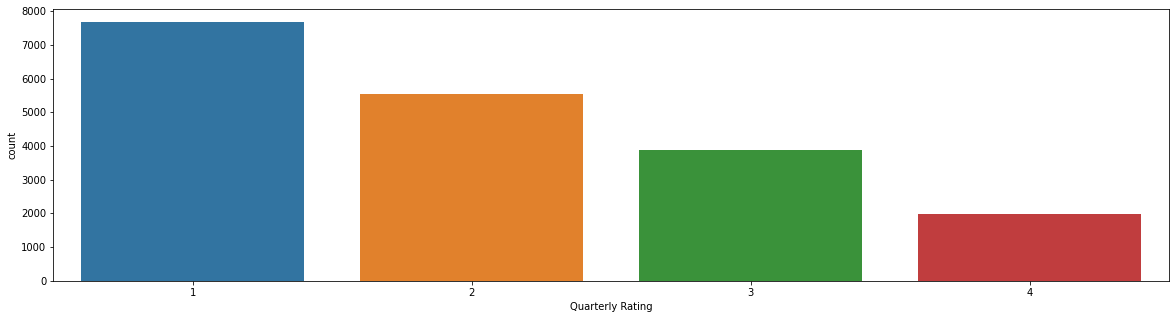


**************************************************



In [ ]:
for i in range (n):

  plt.figure(figsize = (20,5))
  sns.countplot(x=df[catt_col[i]] , data =df)
  plt.show()
  print()
  print("*"*50)
  print()

## **Datetime Columns**

In [ ]:
dt_col = (df.dtypes == "datetime64[ns]")
dt_col = list(dt_col[dt_col].index)
dt_col

['MMM-YY', 'Dateofjoining', 'LastWorkingDate']

In [ ]:
n = len(dt_col)
n

3

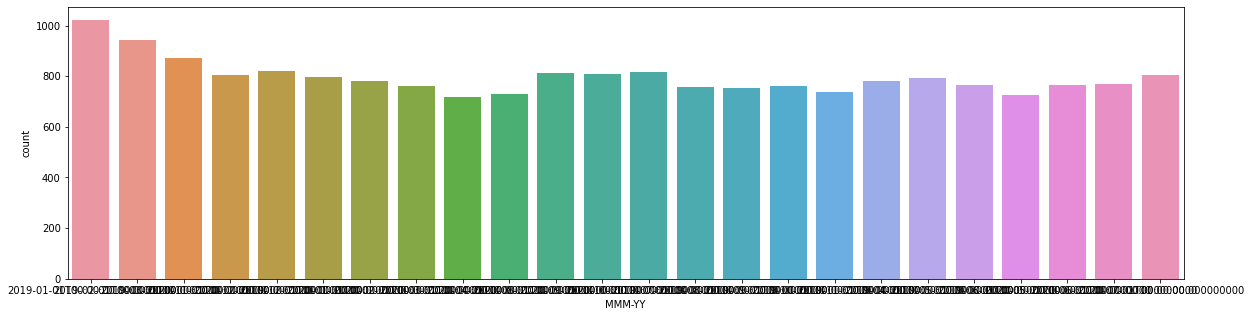


**************************************************



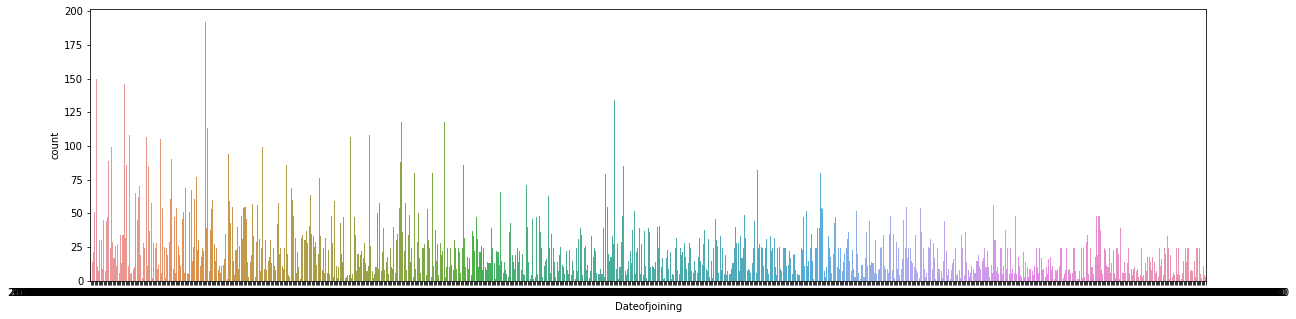


**************************************************



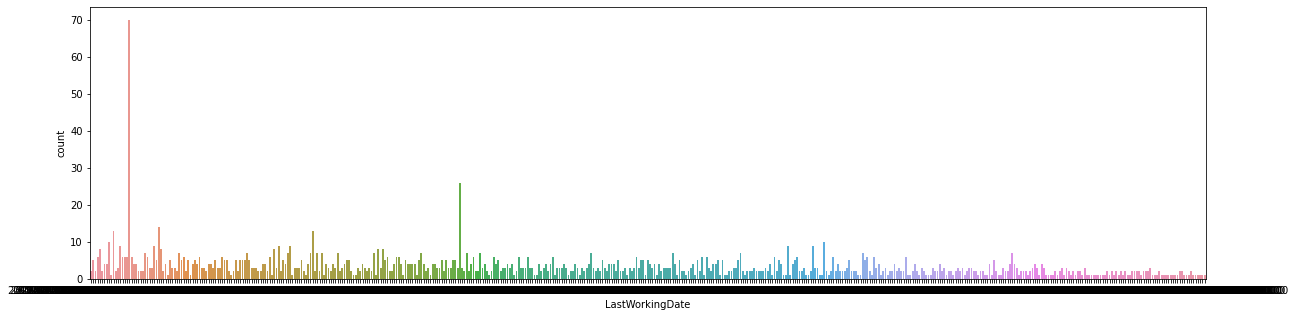


**************************************************



In [ ]:
for i in range (n):

  plt.figure(figsize = (20,5))
  sns.countplot(x=df[dt_col[i]] , data =df)
  plt.show()
  print()
  print("*"*50)
  print()

### **MMM-YY**

In [ ]:
df["MMM-YY"].dt.year.value_counts()

2019    9708
2020    9396
Name: MMM-YY, dtype: int64

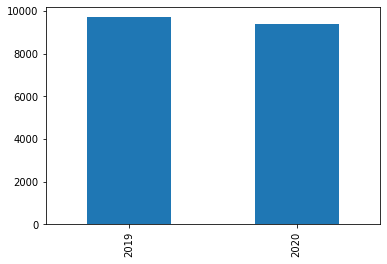

In [ ]:
df["MMM-YY"].dt.year.value_counts().plot(kind="bar")
plt.show()

In [ ]:
df["MMM-YY"].dt.month.value_counts()

1     1804
2     1705
12    1614
3     1589
11    1586
9     1571
8     1566
7     1563
10    1557
5     1530
4     1523
6     1496
Name: MMM-YY, dtype: int64

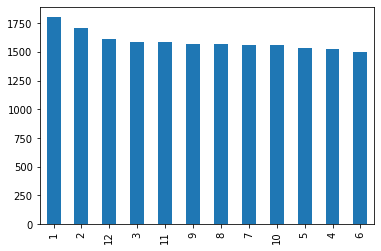

In [ ]:
df["MMM-YY"].dt.month.value_counts().plot(kind="bar")
plt.show()

In [ ]:
df["MMM-YY"].dt.date.value_counts()

2019-01-01    1022
2019-02-01     944
2019-03-01     870
2020-12-01     819
2020-10-01     818
2020-08-01     812
2020-09-01     809
2020-07-01     806
2020-11-01     805
2019-12-01     795
2019-04-01     794
2020-01-01     782
2019-11-01     781
2020-06-01     770
2020-05-01     766
2019-05-01     764
2019-09-01     762
2020-02-01     761
2019-07-01     757
2019-08-01     754
2019-10-01     739
2020-04-01     729
2019-06-01     726
2020-03-01     719
Name: MMM-YY, dtype: int64

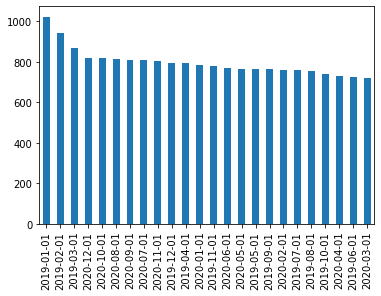

In [ ]:
df["MMM-YY"].dt.date.value_counts().plot(kind="bar")
plt.show()

### **Date of joining**

In [ ]:
df["Dateofjoining"].dt.year.value_counts()

2018    4936
2019    4515
2020    3667
2015    1965
2016    1625
2017    1100
2013     693
2014     603
Name: Dateofjoining, dtype: int64

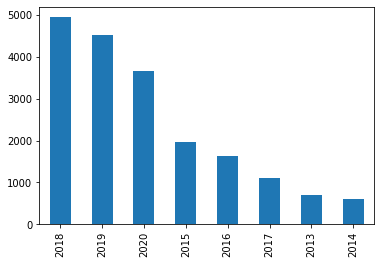

In [ ]:
df["Dateofjoining"].dt.year.value_counts().plot(kind="bar")
plt.show()

In [ ]:
df["Dateofjoining"].dt.month.value_counts()

7     2730
5     2362
10    2095
6     1973
8     1886
11    1867
9     1449
1     1381
12    1261
4     1014
2      684
3      402
Name: Dateofjoining, dtype: int64

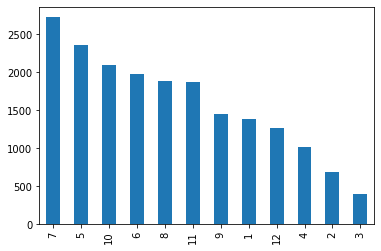

In [ ]:
df["Dateofjoining"].dt.month.value_counts().plot(kind="bar")
plt.show()

### **Last Working Date**

In [ ]:
df["LastWorkingDate"].dt.year.value_counts()

2019.0    825
2020.0    786
2018.0      5
Name: LastWorkingDate, dtype: int64

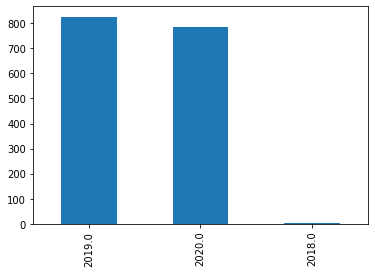

In [ ]:
df["LastWorkingDate"].dt.year.value_counts().plot(kind="bar")
plt.show()

In [ ]:
df["LastWorkingDate"].dt.month.value_counts()

7.0     189
5.0     161
2.0     155
1.0     152
9.0     145
11.0    142
6.0     138
3.0     133
10.0    132
12.0    121
4.0      91
8.0      57
Name: LastWorkingDate, dtype: int64

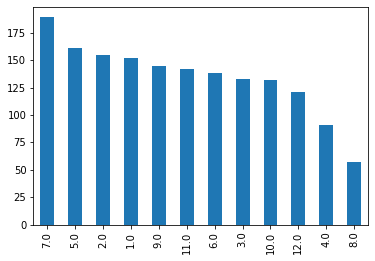

In [ ]:
df["LastWorkingDate"].dt.month.value_counts().plot(kind="bar")
plt.show()

# **Bivariate**

In [ ]:
int_col = (df.dtypes == "int64")
int_col = list(int_col[int_col].index)
for int in int_col:
  print(int)
  print(df[int].nunique())
  print("")

Driver_ID
2381

Income
2383

Total Business Value
10181



In [ ]:
float_col = (df.dtypes == "float")
float_col = list(float_col[float_col].index)
for float in float_col:
  print(float)
  print(df[float].nunique())
  print("")

Age
36

Gender
2



In [ ]:
cat_col = (df.dtypes == "category")
cat_col = list(cat_col[cat_col].index)
for cat in cat_col:
  print(cat)
  print(df[cat].nunique())
  print("")

Education_Level
3

Joining Designation
5

Grade
5

Quarterly Rating
4



In [ ]:
obj_col = (df.dtypes == "object")
obj_col = list(obj_col[obj_col].index)
for obj in obj_col:
  print(obj)
  print(df[obj].nunique())
  print("")

City
29



In [ ]:
dt_col = (df.dtypes == "datetime64[ns]")
dt_col = list(dt_col[dt_col].index)
for dt in dt_col:
  print(dt)
  print(df[dt].nunique())
  print("")

MMM-YY
24

Dateofjoining
869

LastWorkingDate
493



In [ ]:
c = len(cat_col)
c

4

In [ ]:
i = len(int_col)
i

3

In [ ]:
f = len(float_col)
f

2

In [ ]:
o = len(obj_col)
o

1

In [ ]:
d = len(dt_col)
d

3

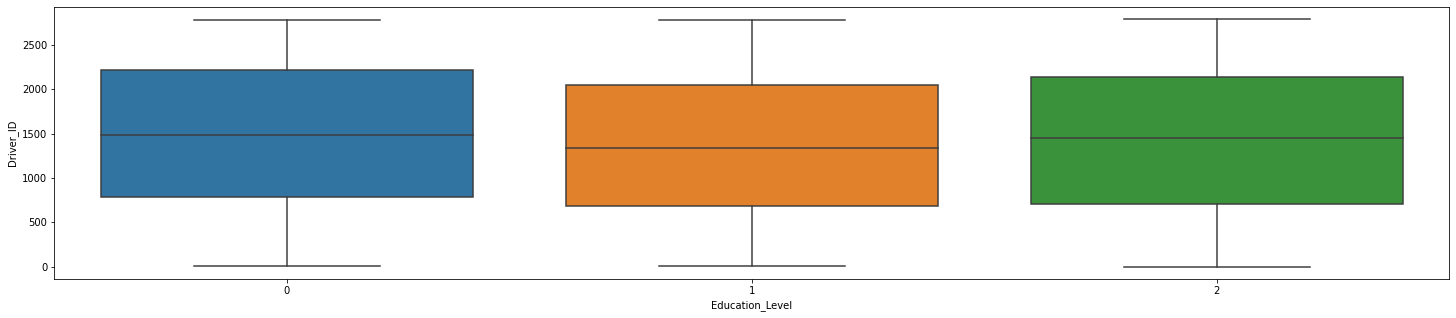

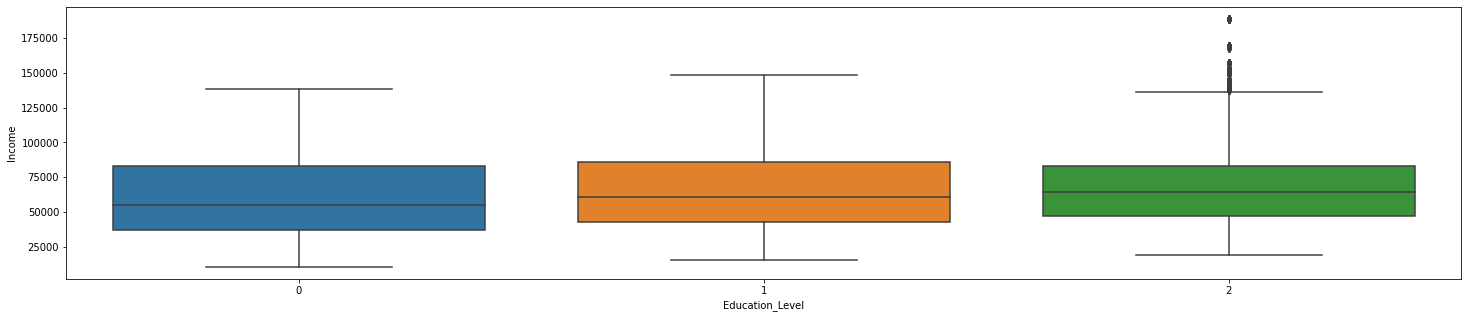

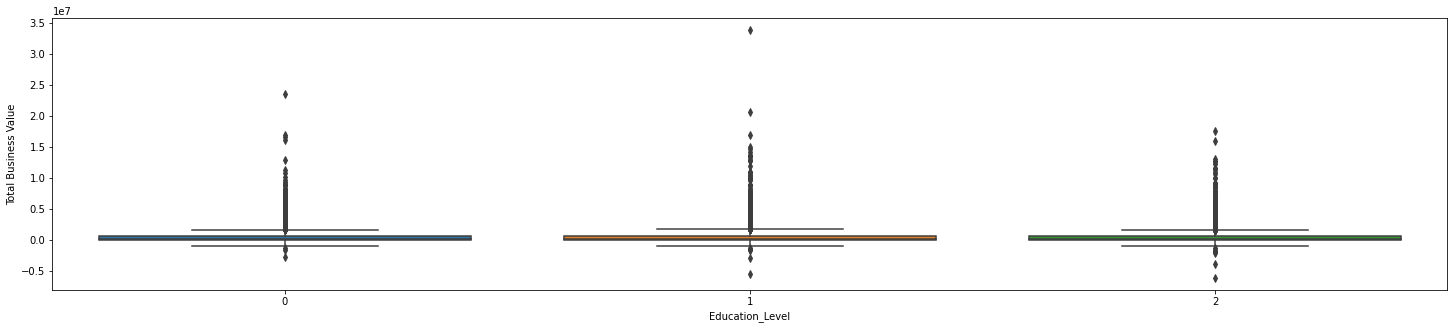

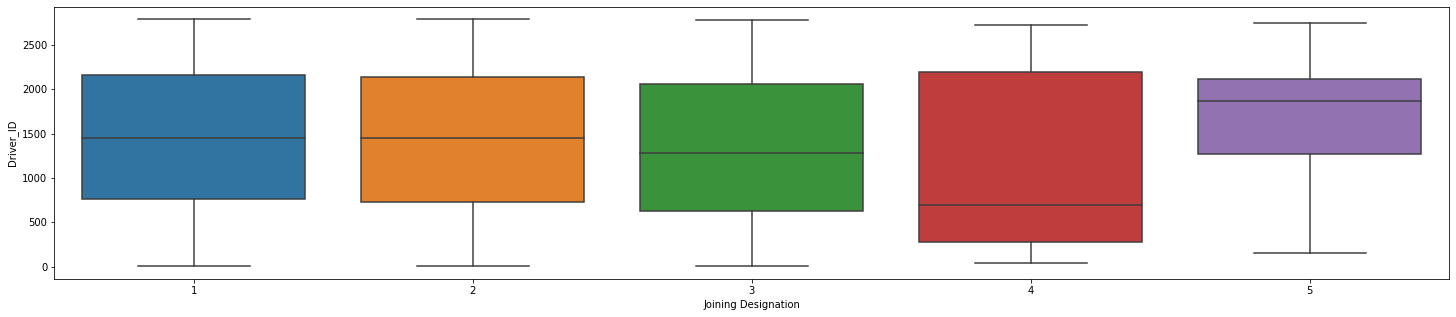

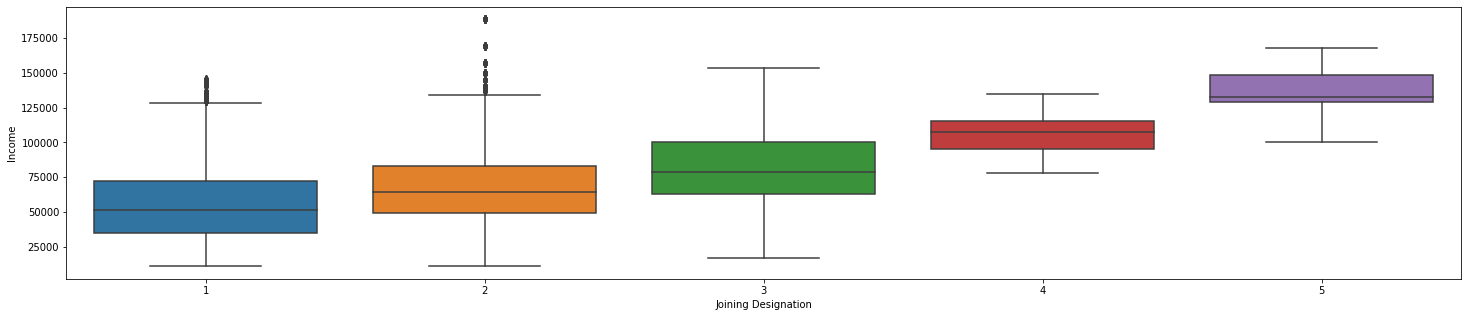

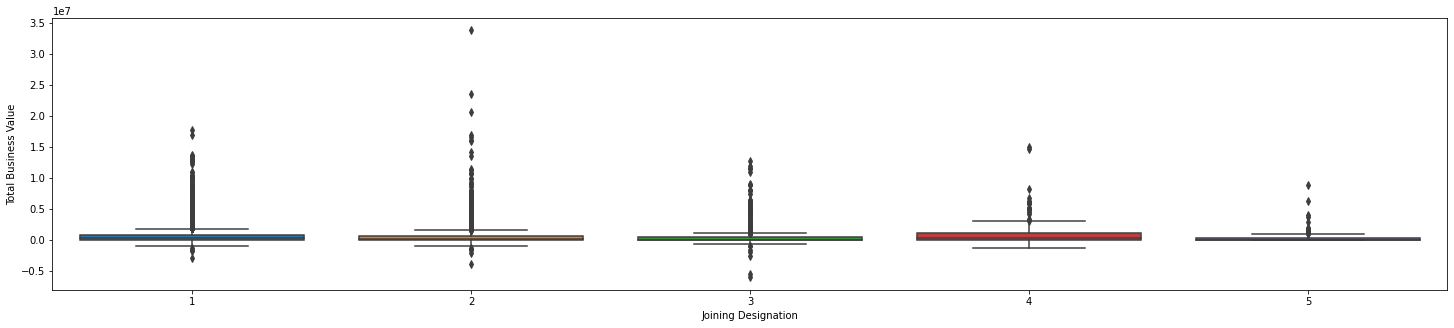

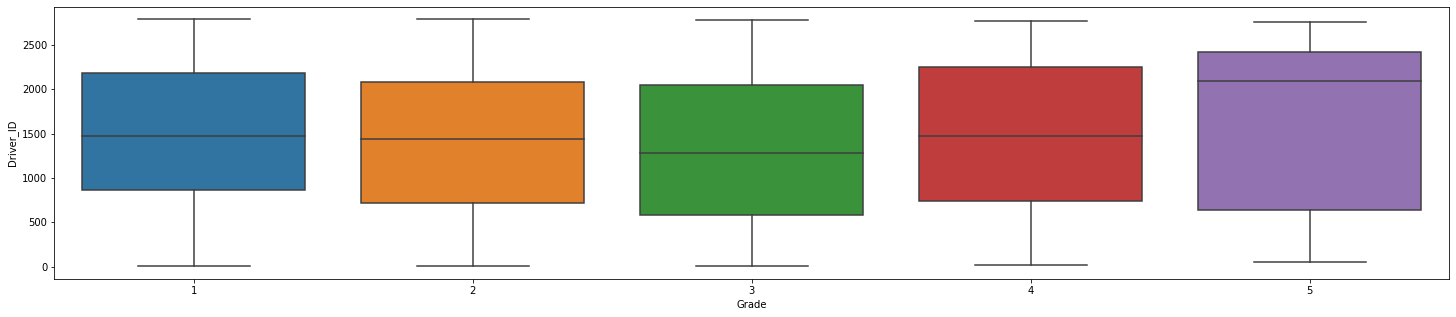

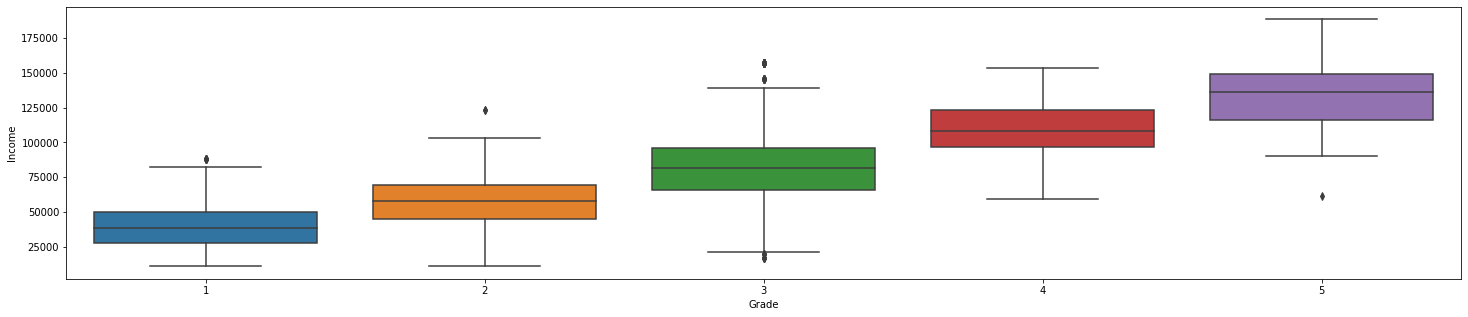

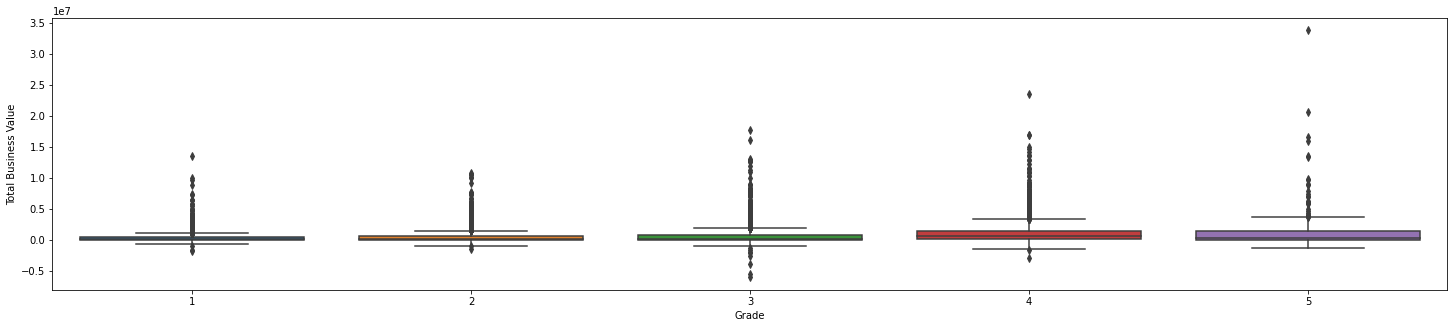

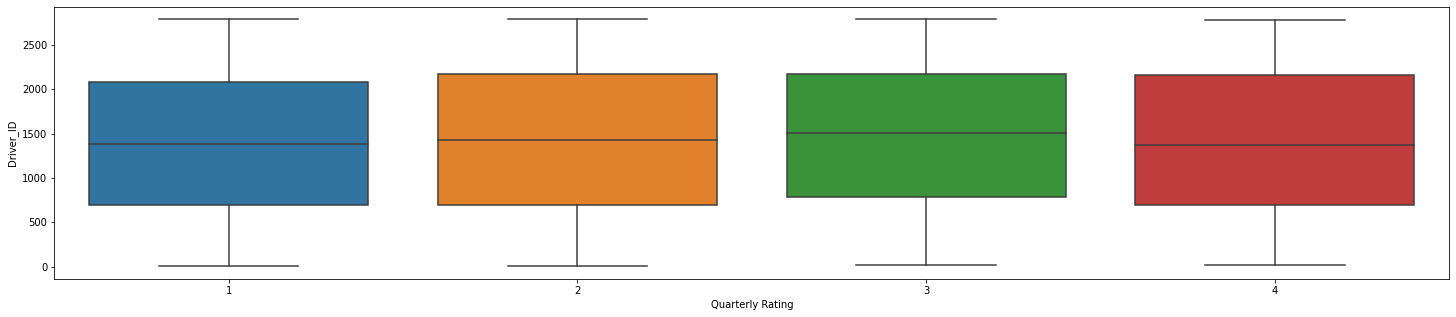

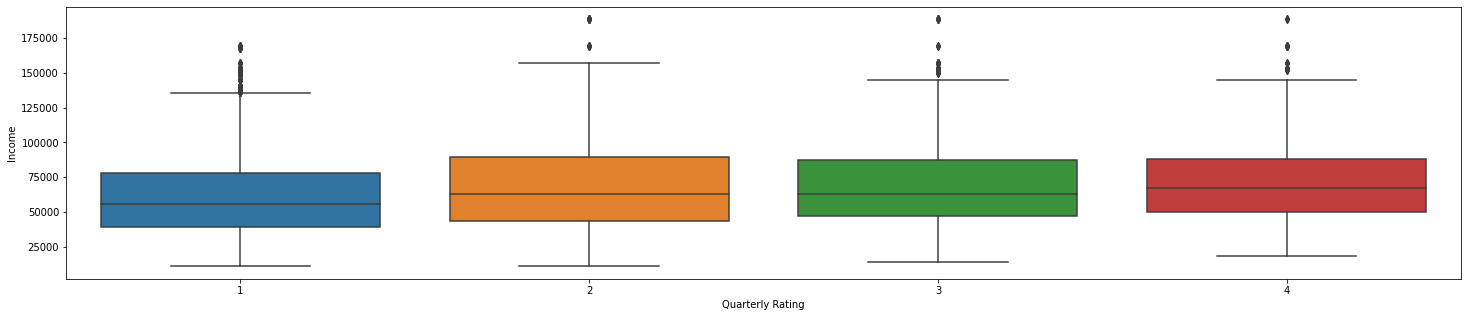

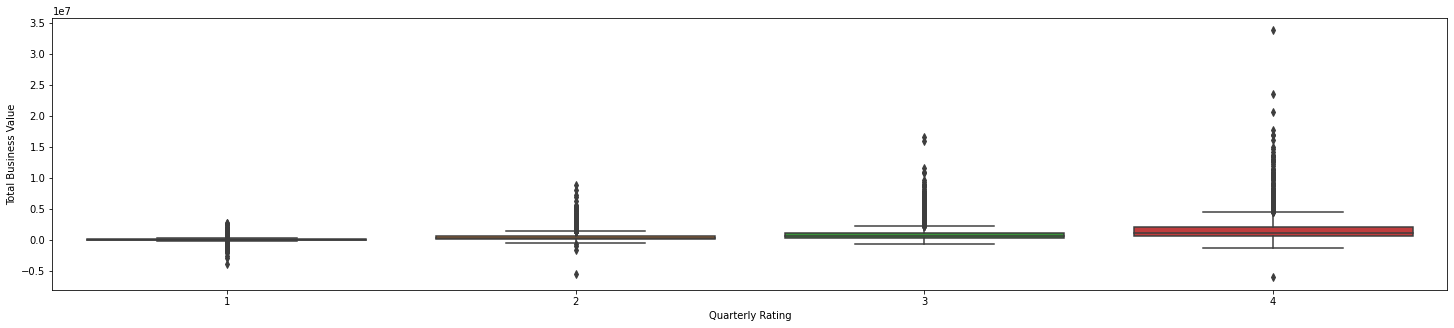

In [ ]:
for l in range (c):
  for m in range (i):

    plt.figure(figsize = (25,5))
    sns.boxplot(x = cat_col[l] , y = int_col[m] , data =df)
    plt.show()

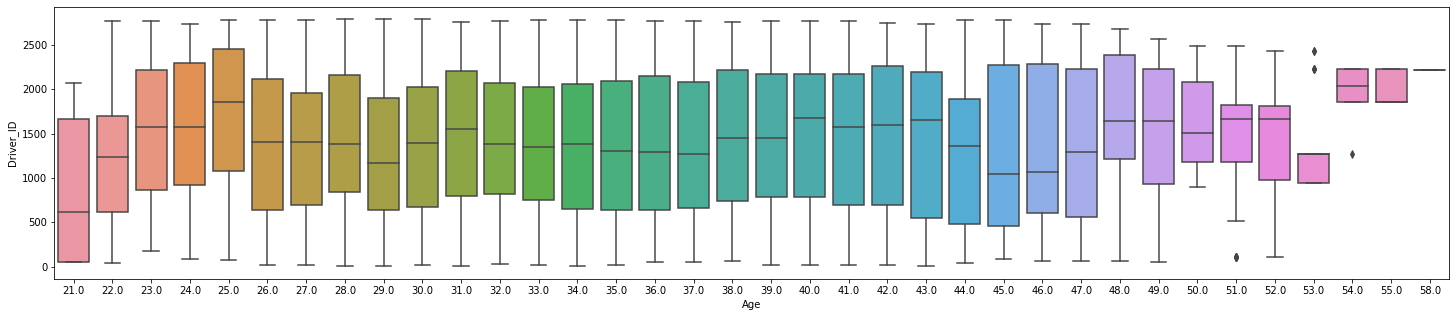

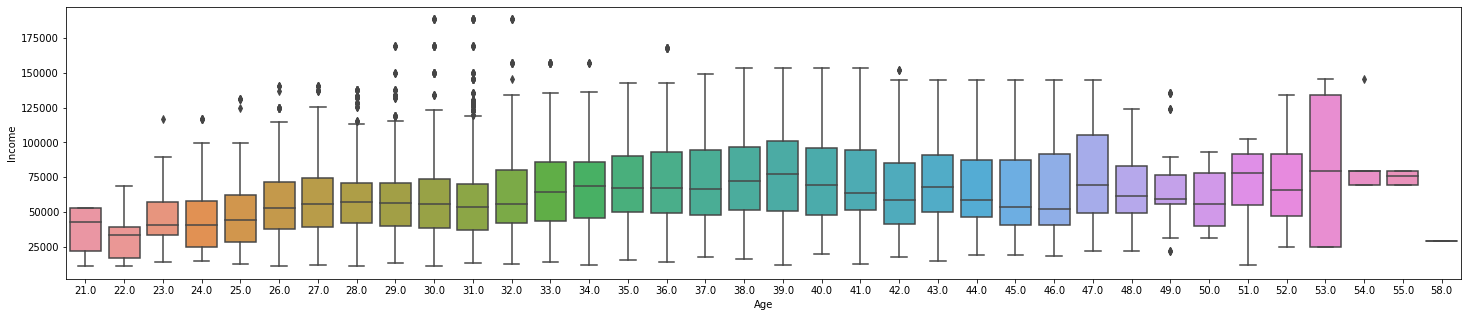

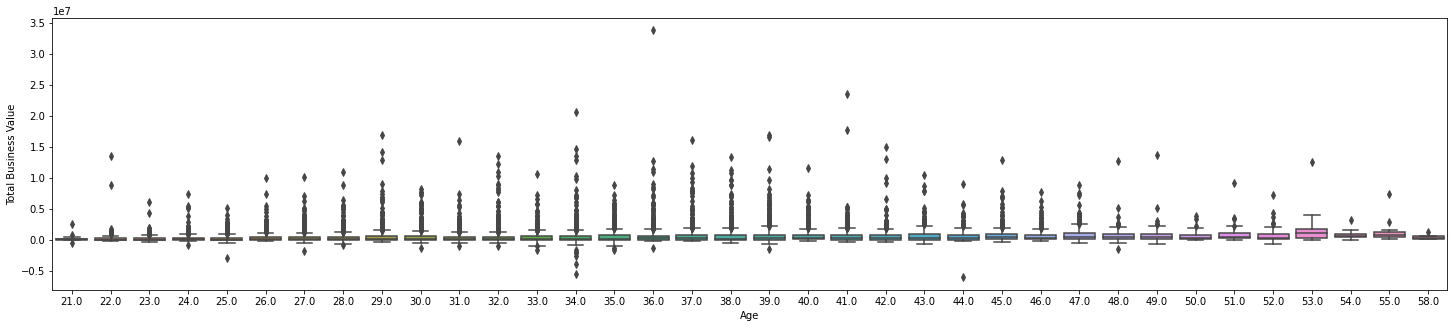

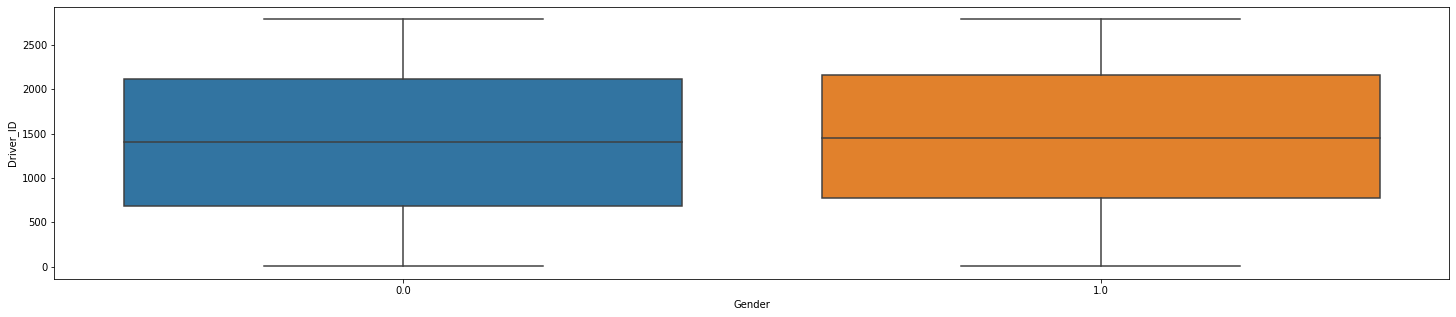

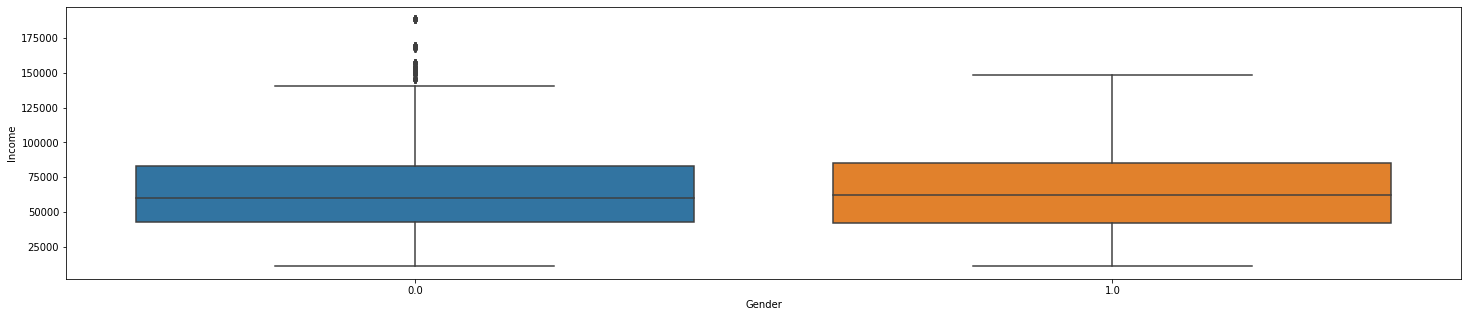

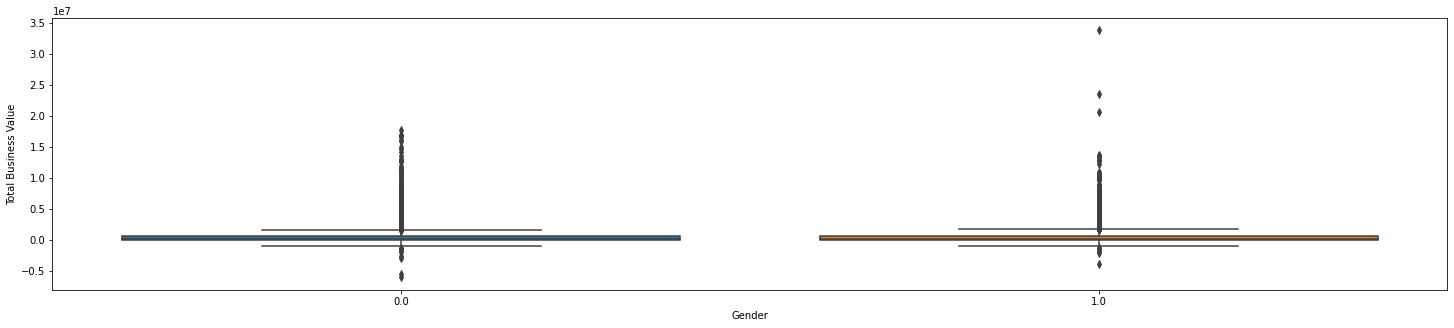

In [ ]:
for l in range (f):
  for m in range (i):

    plt.figure(figsize = (25,5))
    sns.boxplot(x = float_col[l] , y = int_col[m] , data =df)
    plt.show()

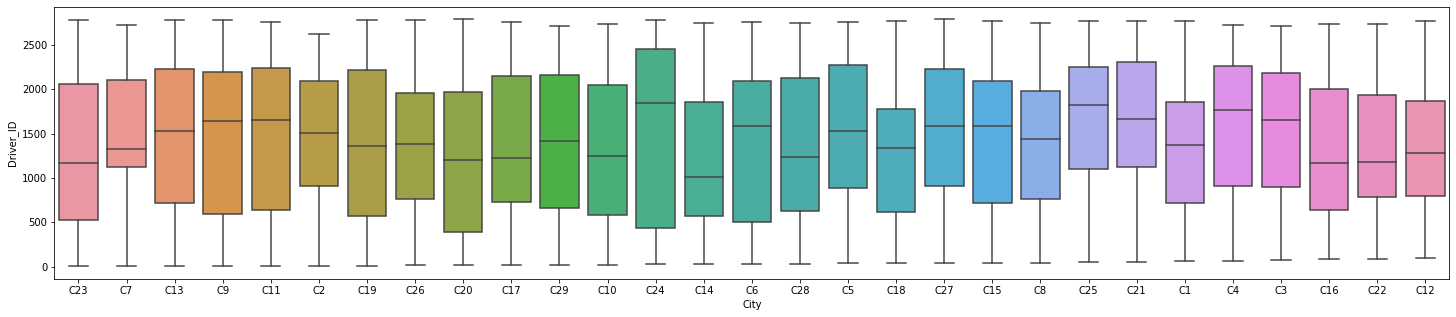

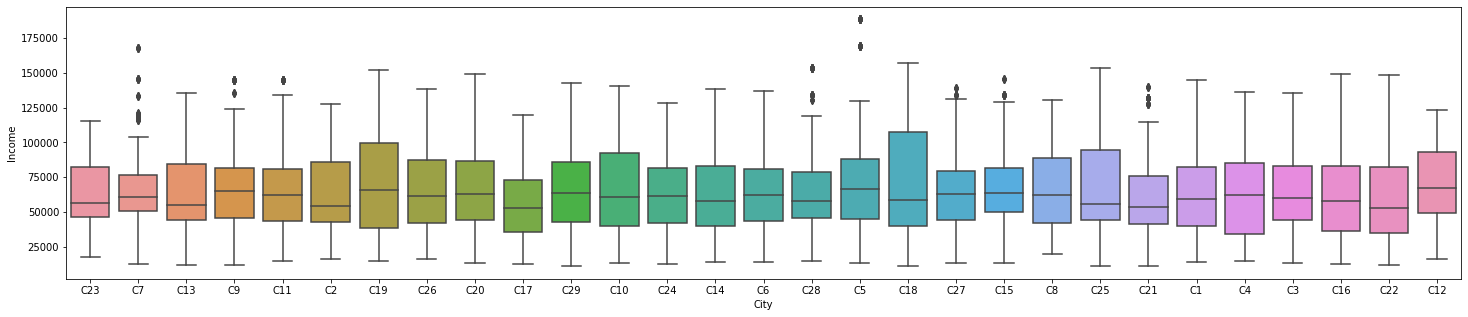

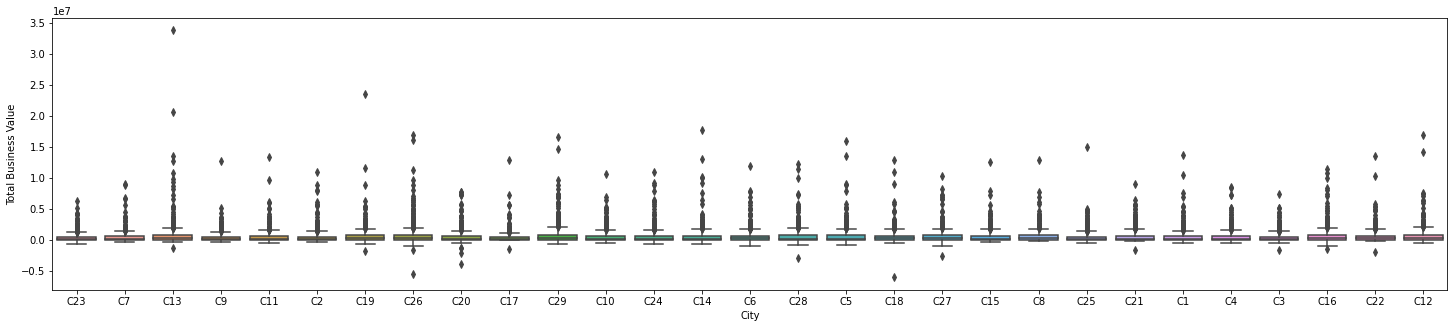

In [ ]:
for l in range (o):
  for m in range (i):

    plt.figure(figsize = (25,5))
    sns.boxplot(x = obj_col[l] , y = int_col[m] , data =df)
    plt.show()

<AxesSubplot:xlabel='Quarterly Rating', ylabel='Age'>

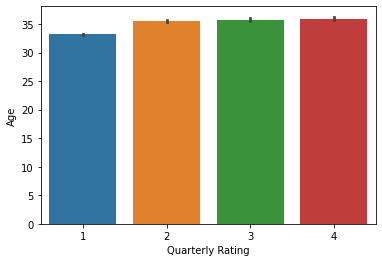

In [ ]:
sns.barplot(x="Quarterly Rating" , y="Age",data=df)

<AxesSubplot:xlabel='Education_Level', ylabel='Age'>

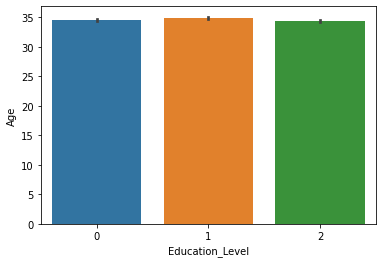

In [ ]:
sns.barplot(x="Education_Level" , y="Age",data=df)

<AxesSubplot:xlabel='Joining Designation', ylabel='Age'>

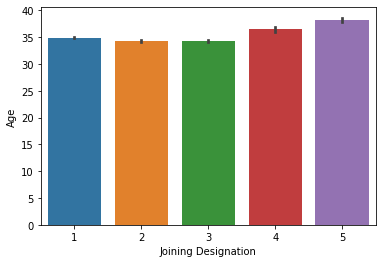

In [ ]:
sns.barplot(x="Joining Designation" , y="Age",data=df)

<AxesSubplot:xlabel='Grade', ylabel='Age'>

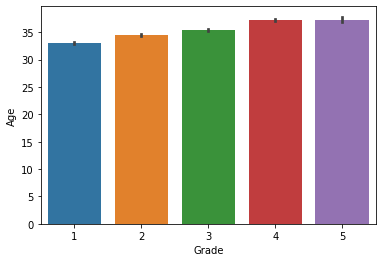

In [ ]:
sns.barplot(x="Grade" , y="Age",data=df)

<AxesSubplot:xlabel='Quarterly Rating', ylabel='count'>

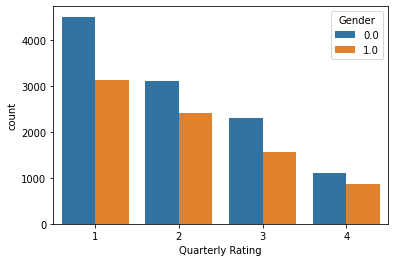

In [ ]:
sns.countplot(x="Quarterly Rating" , hue="Gender",data=df)

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

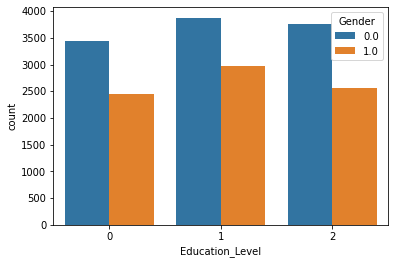

In [ ]:
sns.countplot(x="Education_Level" , hue="Gender",data=df)

<AxesSubplot:xlabel='Joining Designation', ylabel='count'>

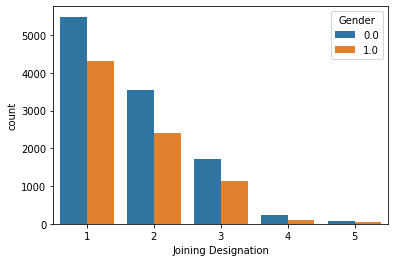

In [ ]:
sns.countplot(x="Joining Designation" , hue="Gender",data=df)

<AxesSubplot:xlabel='Grade', ylabel='count'>

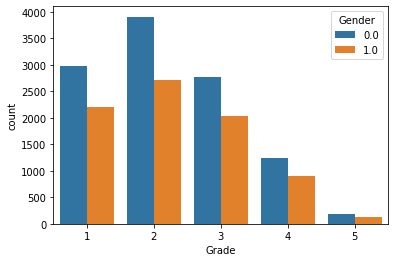

In [ ]:
sns.countplot(x="Grade" , hue="Gender",data=df)

# **Multivariate**

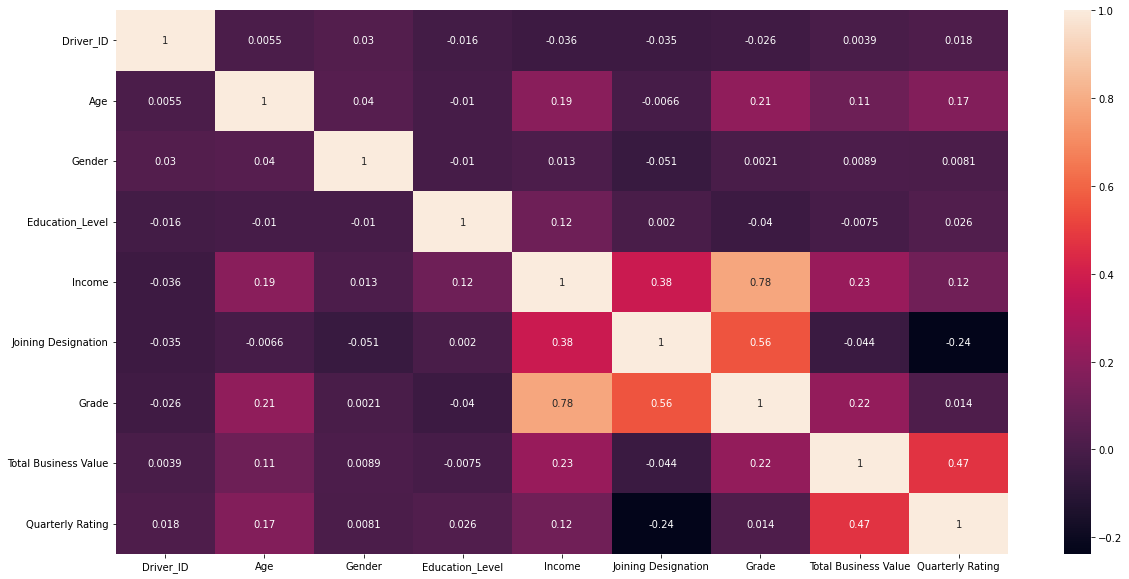

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(data = df1.corr() , annot=True)
plt.show()

# **Range of Attributes**

In [ ]:
num_col = (df1.dtypes != "object")
num_col = list(num_col[num_col].index)

for num in num_col:
  print(num)
  print("MIN :- " , df1[num].min())
  print("MAX :- " , df1[num].max())
  print("MEAN :- " , df1[num].mean())
  print("MEDIAN :-" , df1[num].median())
  print("")

Driver_ID
MIN :-  1
MAX :-  2788
MEAN :-  1415.5911327470687
MEDIAN :- 1417.0

Age
MIN :-  21.0
MAX :-  58.0
MEAN :-  34.668434595389385
MEDIAN :- 34.0

Gender
MIN :-  0.0
MAX :-  1.0
MEAN :-  0.4187486878018056
MEDIAN :- 0.0

Education_Level
MIN :-  0
MAX :-  2
MEAN :-  1.0216708542713568
MEDIAN :- 1.0

Income
MIN :-  10747
MAX :-  188418
MEAN :-  65652.02512562813
MEDIAN :- 60087.0

Joining Designation
MIN :-  1
MAX :-  5
MEAN :-  1.690536013400335
MEDIAN :- 1.0

Grade
MIN :-  1
MAX :-  5
MEAN :-  2.2526695979899496
MEDIAN :- 2.0

Total Business Value
MIN :-  -6000000
MAX :-  33747720
MEAN :-  571662.074958124
MEDIAN :- 250000.0

Quarterly Rating
MIN :-  1
MAX :-  4
MEAN :-  2.008898659966499
MEDIAN :- 2.0



# **Missing Value**

In [ ]:
df.isnull().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [ ]:
percent_missing = (df.isnull().sum()/len(df))*100
percent_missing

MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

# **KNN Imputation**

Removing missing values using KNN imputation techanique

In [ ]:
df_num = df.select_dtypes(include=["float64","int64"])

In [ ]:
df_num

,Driver_ID,Age,Gender,Income,Total Business Value
0,1,28.0,0.0,57387,2381060
1,1,28.0,0.0,57387,-665480
2,1,28.0,0.0,57387,0
3,2,31.0,0.0,67016,0
4,2,31.0,0.0,67016,0
...,...,...,...,...,...
19099,2788,30.0,0.0,70254,740280
19100,2788,30.0,0.0,70254,448370
19101,2788,30.0,0.0,70254,0
19102,2788,30.0,0.0,70254,200420


In [ ]:
imputer = KNNImputer(n_neighbors=5)
df_num = pd.DataFrame(imputer.fit_transform(df_num),columns = df_num.columns)

In [ ]:
df_num.isna().sum()

Driver_ID               0
Age                     0
Gender                  0
Income                  0
Total Business Value    0
dtype: int64

In [ ]:
df_cat = df.select_dtypes(include=["object" ,"category","datetime64[ns]"])
df_cat

,MMM-YY,City,Education_Level,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Quarterly Rating
0,2019-01-01,C23,2,2018-12-24,NaT,1,1,2
1,2019-02-01,C23,2,2018-12-24,NaT,1,1,2
2,2019-03-01,C23,2,2018-12-24,2019-03-11,1,1,2
3,2020-11-01,C7,2,2020-11-06,NaT,2,2,1
4,2020-12-01,C7,2,2020-11-06,NaT,2,2,1
...,...,...,...,...,...,...,...,...
19099,2020-08-01,C27,2,2020-06-08,NaT,2,2,3
19100,2020-09-01,C27,2,2020-06-08,NaT,2,2,3
19101,2020-10-01,C27,2,2020-06-08,NaT,2,2,2
19102,2020-11-01,C27,2,2020-06-08,NaT,2,2,2


In [ ]:
df_cat.isnull().sum()

MMM-YY                     0
City                       0
Education_Level            0
Dateofjoining              0
LastWorkingDate        17488
Joining Designation        0
Grade                      0
Quarterly Rating           0
dtype: int64

In [ ]:
df = pd.concat([df_num, df_cat], axis=1)
df

,Driver_ID,Age,Gender,Income,Total Business Value,MMM-YY,City,Education_Level,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Quarterly Rating
0,1.0,28.0,0.0,57387.0,2381060.0,2019-01-01,C23,2,2018-12-24,NaT,1,1,2
1,1.0,28.0,0.0,57387.0,-665480.0,2019-02-01,C23,2,2018-12-24,NaT,1,1,2
2,1.0,28.0,0.0,57387.0,0.0,2019-03-01,C23,2,2018-12-24,2019-03-11,1,1,2
3,2.0,31.0,0.0,67016.0,0.0,2020-11-01,C7,2,2020-11-06,NaT,2,2,1
4,2.0,31.0,0.0,67016.0,0.0,2020-12-01,C7,2,2020-11-06,NaT,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2788.0,30.0,0.0,70254.0,740280.0,2020-08-01,C27,2,2020-06-08,NaT,2,2,3
19100,2788.0,30.0,0.0,70254.0,448370.0,2020-09-01,C27,2,2020-06-08,NaT,2,2,3
19101,2788.0,30.0,0.0,70254.0,0.0,2020-10-01,C27,2,2020-06-08,NaT,2,2,2
19102,2788.0,30.0,0.0,70254.0,200420.0,2020-11-01,C27,2,2020-06-08,NaT,2,2,2


In [ ]:
df.isna().sum()   # removed all the missing values

Driver_ID                   0
Age                         0
Gender                      0
Income                      0
Total Business Value        0
MMM-YY                      0
City                        0
Education_Level             0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Quarterly Rating            0
dtype: int64

# **Aggregation**

In [ ]:
df.head()

,Driver_ID,Age,Gender,Income,Total Business Value,MMM-YY,City,Education_Level,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Quarterly Rating
0,1.0,28.0,0.0,57387.0,2381060.0,2019-01-01,C23,2,2018-12-24,NaT,1,1,2
1,1.0,28.0,0.0,57387.0,-665480.0,2019-02-01,C23,2,2018-12-24,NaT,1,1,2
2,1.0,28.0,0.0,57387.0,0.0,2019-03-01,C23,2,2018-12-24,2019-03-11,1,1,2
3,2.0,31.0,0.0,67016.0,0.0,2020-11-01,C7,2,2020-11-06,NaT,2,2,1
4,2.0,31.0,0.0,67016.0,0.0,2020-12-01,C7,2,2020-11-06,NaT,2,2,1


In [ ]:
creat_df_dic = {
    'Age':'last',
    'Gender':'last',
    'Education_Level':'last',
    'City':'last',
    'Dateofjoining':'first',
    'Joining Designation': 'last',
    'Grade': 'last',  
    'MMM-YY':'last',
    'Income': ['first' , 'last'],
    'Quarterly Rating':['first' , 'last'],
    'Total Business Value': 'sum',
    'LastWorkingDate':'last'
    
}

In [ ]:
df_new = df.groupby('Driver_ID').agg(creat_df_dic).reset_index()

In [ ]:
df_new.head()

Driver_ID   Age Gender Education_Level City Dateofjoining  \
             last   last            last last         first   
0       1.0  28.0    0.0               2  C23    2018-12-24   
1       2.0  31.0    0.0               2   C7    2020-11-06   
2       4.0  43.0    0.0               2  C13    2019-12-07   
3       5.0  29.0    0.0               0   C9    2019-01-09   
4       6.0  31.0    1.0               1  C11    2020-07-31   

  Joining Designation Grade     MMM-YY   Income          Quarterly Rating  \
                 last  last       last    first     last            first   
0                   1     1 2019-03-01  57387.0  57387.0                2   
1                   2     2 2020-12-01  67016.0  67016.0                1   
2                   2     2 2020-04-01  65603.0  65603.0                1   
3                   1     1 2019-03-01  46368.0  46368.0                1   
4                   3     3 2020-12-01  78728.0  78728.0                1   

       Total Business Value LastWorkingDate  
  last                  sum            last  
0    2            1715580.0      2019-03-11  
1    1                  0.0             NaT  
2    1             350000.0      2020-04-27  
3    1             120360.0      2019-03-07  
4    2            1265000.0             NaT

In [ ]:
df_new.shape

(2381, 15)

In [ ]:
df_new.isnull().sum()

Driver_ID                        0
Age                   last       0
Gender                last       0
Education_Level       last       0
City                  last       0
Dateofjoining         first      0
Joining Designation   last       0
Grade                 last       0
MMM-YY                last       0
Income                first      0
                      last       0
Quarterly Rating      first      0
                      last       0
Total Business Value  sum        0
LastWorkingDate       last     765
dtype: int64

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   (Driver_ID, )                2381 non-null   float64       
 1   (Age, last)                  2381 non-null   float64       
 2   (Gender, last)               2381 non-null   float64       
 3   (Education_Level, last)      2381 non-null   category      
 4   (City, last)                 2381 non-null   object        
 5   (Dateofjoining, first)       2381 non-null   datetime64[ns]
 6   (Joining Designation, last)  2381 non-null   category      
 7   (Grade, last)                2381 non-null   category      
 8   (MMM-YY, last)               2381 non-null   datetime64[ns]
 9   (Income, first)              2381 non-null   float64       
 10  (Income, last)               2381 non-null   float64       
 11  (Quarterly Rating, first)    2381 non-null 

In [ ]:
df_new.columns

MultiIndex([(           'Driver_ID',      ''),
            (                 'Age',  'last'),
            (              'Gender',  'last'),
            (     'Education_Level',  'last'),
            (                'City',  'last'),
            (       'Dateofjoining', 'first'),
            ( 'Joining Designation',  'last'),
            (               'Grade',  'last'),
            (              'MMM-YY',  'last'),
            (              'Income', 'first'),
            (              'Income',  'last'),
            (    'Quarterly Rating', 'first'),
            (    'Quarterly Rating',  'last'),
            ('Total Business Value',   'sum'),
            (     'LastWorkingDate',  'last')],
           )

In [ ]:
df_new.columns = ['Driver_ID', 
                  'Age',
                  'Gender',
                  'Education_Level',
                  'City',
                  'Dateofjoining',
                  'Joining Designation',
                  'Grade',
                  'MMM-YY',
                  'Income_first',
                  'Income_last',
                  'Quarterly Rating_first',
                  'Quarterly Rating_last',
                  'Total Business Value_sum',
                  'LastWorkingDate']

In [ ]:
df_new.head()

,Driver_ID,Age,Gender,Education_Level,City,Dateofjoining,Joining Designation,Grade,MMM-YY,Income_first,Income_last,Quarterly Rating_first,Quarterly Rating_last,Total Business Value_sum,LastWorkingDate
0,1.0,28.0,0.0,2,C23,2018-12-24,1,1,2019-03-01,57387.0,57387.0,2,2,1715580.0,2019-03-11
1,2.0,31.0,0.0,2,C7,2020-11-06,2,2,2020-12-01,67016.0,67016.0,1,1,0.0,NaT
2,4.0,43.0,0.0,2,C13,2019-12-07,2,2,2020-04-01,65603.0,65603.0,1,1,350000.0,2020-04-27
3,5.0,29.0,0.0,0,C9,2019-01-09,1,1,2019-03-01,46368.0,46368.0,1,1,120360.0,2019-03-07
4,6.0,31.0,1.0,1,C11,2020-07-31,3,3,2020-12-01,78728.0,78728.0,1,2,1265000.0,NaT


# **Feature Engineering**

### **1.**

In [ ]:
df_new['Quarterly Rating_last'] = df_new['Quarterly Rating_last'].astype("int64")
df_new['Quarterly Rating_first'] = df_new['Quarterly Rating_first'].astype("int64")

In [ ]:
df_new["Quarterly Rating_diff"] = df_new['Quarterly Rating_last'] - df_new['Quarterly Rating_first']

In [ ]:
def new_rating(x):
  if x > 0:
    return 1
  else:
    return 0

In [ ]:
df_new["new_Quarterly Rating"] = df_new["Quarterly Rating_diff"].apply(new_rating)

In [ ]:
df_new.head()

,Driver_ID,Age,Gender,Education_Level,City,Dateofjoining,Joining Designation,Grade,MMM-YY,Income_first,Income_last,Quarterly Rating_first,Quarterly Rating_last,Total Business Value_sum,LastWorkingDate,Quarterly Rating_diff,new_Quarterly Rating
0,1.0,28.0,0.0,2,C23,2018-12-24,1,1,2019-03-01,57387.0,57387.0,2,2,1715580.0,2019-03-11,0,0
1,2.0,31.0,0.0,2,C7,2020-11-06,2,2,2020-12-01,67016.0,67016.0,1,1,0.0,NaT,0,0
2,4.0,43.0,0.0,2,C13,2019-12-07,2,2,2020-04-01,65603.0,65603.0,1,1,350000.0,2020-04-27,0,0
3,5.0,29.0,0.0,0,C9,2019-01-09,1,1,2019-03-01,46368.0,46368.0,1,1,120360.0,2019-03-07,0,0
4,6.0,31.0,1.0,1,C11,2020-07-31,3,3,2020-12-01,78728.0,78728.0,1,2,1265000.0,NaT,1,1


In [ ]:
df_new["new_Quarterly Rating"].value_counts()

0    2023
1     358
Name: new_Quarterly Rating, dtype: int64

<AxesSubplot:>

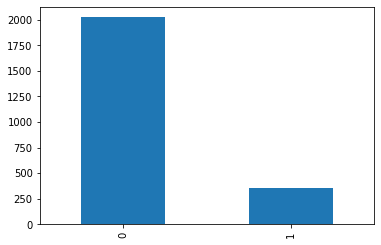

In [ ]:
df_new["new_Quarterly Rating"].value_counts().plot(kind = "bar")

### **2.**

In [ ]:
df_new["LastWorkingDate"] = df_new["LastWorkingDate"].replace(np.nan, 0)

In [ ]:
def target(x):
  if x == 0:
    return 0
  else:
    return 1

In [ ]:
df_new['target'] = df_new["LastWorkingDate"].apply(target)

In [ ]:
df_new.head()

,Driver_ID,Age,Gender,Education_Level,City,Dateofjoining,Joining Designation,Grade,MMM-YY,Income_first,Income_last,Quarterly Rating_first,Quarterly Rating_last,Total Business Value_sum,LastWorkingDate,Quarterly Rating_diff,new_Quarterly Rating,target
0,1.0,28.0,0.0,2,C23,2018-12-24,1,1,2019-03-01,57387.0,57387.0,2,2,1715580.0,2019-03-11 00:00:00,0,0,1
1,2.0,31.0,0.0,2,C7,2020-11-06,2,2,2020-12-01,67016.0,67016.0,1,1,0.0,0,0,0,0
2,4.0,43.0,0.0,2,C13,2019-12-07,2,2,2020-04-01,65603.0,65603.0,1,1,350000.0,2020-04-27 00:00:00,0,0,1
3,5.0,29.0,0.0,0,C9,2019-01-09,1,1,2019-03-01,46368.0,46368.0,1,1,120360.0,2019-03-07 00:00:00,0,0,1
4,6.0,31.0,1.0,1,C11,2020-07-31,3,3,2020-12-01,78728.0,78728.0,1,2,1265000.0,0,1,1,0


In [ ]:
df_new["target"].value_counts()

1    1616
0     765
Name: target, dtype: int64

<AxesSubplot:>

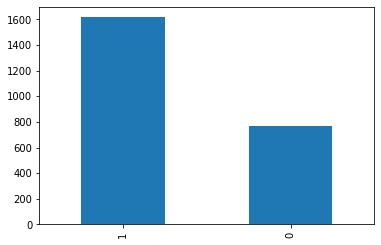

In [ ]:
df_new["target"].value_counts().plot(kind="bar")

### **3.**

In [ ]:
df_new["Income_diff"] = df_new['Income_last'] - df_new['Income_first']

In [ ]:
def new_rating(x):
  if x > 0:
    return 1
  else:
    return 0

In [ ]:
df_new["new_Income"] = df_new["Income_diff"].apply(new_rating)

In [ ]:
df_new.head()

,Driver_ID,Age,Gender,Education_Level,City,Dateofjoining,Joining Designation,Grade,MMM-YY,Income_first,Income_last,Quarterly Rating_first,Quarterly Rating_last,Total Business Value_sum,LastWorkingDate,Quarterly Rating_diff,new_Quarterly Rating,target,Income_diff,new_Income
0,1.0,28.0,0.0,2,C23,2018-12-24,1,1,2019-03-01,57387.0,57387.0,2,2,1715580.0,2019-03-11 00:00:00,0,0,1,0.0,0
1,2.0,31.0,0.0,2,C7,2020-11-06,2,2,2020-12-01,67016.0,67016.0,1,1,0.0,0,0,0,0,0.0,0
2,4.0,43.0,0.0,2,C13,2019-12-07,2,2,2020-04-01,65603.0,65603.0,1,1,350000.0,2020-04-27 00:00:00,0,0,1,0.0,0
3,5.0,29.0,0.0,0,C9,2019-01-09,1,1,2019-03-01,46368.0,46368.0,1,1,120360.0,2019-03-07 00:00:00,0,0,1,0.0,0
4,6.0,31.0,1.0,1,C11,2020-07-31,3,3,2020-12-01,78728.0,78728.0,1,2,1265000.0,0,1,1,0,0.0,0


In [ ]:
df_new["new_Income"].value_counts()

0    2338
1      43
Name: new_Income, dtype: int64

<AxesSubplot:>

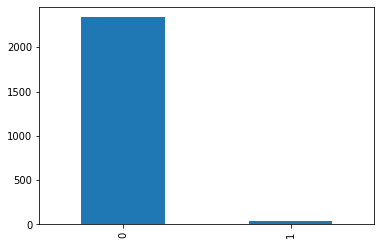

In [ ]:
df_new["new_Income"].value_counts().plot(kind="bar")

# **Statistical summary of the Derived Dataset**

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Driver_ID                 2381 non-null   float64       
 1   Age                       2381 non-null   float64       
 2   Gender                    2381 non-null   float64       
 3   Education_Level           2381 non-null   category      
 4   City                      2381 non-null   object        
 5   Dateofjoining             2381 non-null   datetime64[ns]
 6   Joining Designation       2381 non-null   category      
 7   Grade                     2381 non-null   category      
 8   MMM-YY                    2381 non-null   datetime64[ns]
 9   Income_first              2381 non-null   float64       
 10  Income_last               2381 non-null   float64       
 11  Quarterly Rating_first    2381 non-null   int64         
 12  Quarterly Rating_las

In [ ]:
df_new.columns

Index(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'City',
       'Dateofjoining', 'Joining Designation', 'Grade', 'MMM-YY',
       'Income_first', 'Income_last', 'Quarterly Rating_first',
       'Quarterly Rating_last', 'Total Business Value_sum', 'LastWorkingDate',
       'Quarterly Rating_diff', 'new_Quarterly Rating', 'target',
       'Income_diff', 'new_Income'],
      dtype='object')

In [ ]:
df_new.describe(include = "all")

<ipython-input-899-a0639f145fa0>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_new.describe(include = "all")


,Driver_ID,Age,Gender,Education_Level,City,Dateofjoining,Joining Designation,Grade,MMM-YY,Income_first,Income_last,Quarterly Rating_first,Quarterly Rating_last,Total Business Value_sum,LastWorkingDate,Quarterly Rating_diff,new_Quarterly Rating,target,Income_diff,new_Income
count,2381.000000,2381.000000,2381.000000,2381.0,2381,2381,2381.0,2381.0,2381,2381.000000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.0,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
unique,NaN,NaN,NaN,3.0,29,869,5.0,5.0,24,NaN,NaN,NaN,NaN,NaN,494.0,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2.0,C20,2020-07-31 00:00:00,1.0,2.0,2020-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,802.0,152,31,1026.0,855.0,819,NaN,NaN,NaN,NaN,NaN,765.0,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,2013-04-01 00:00:00,NaN,NaN,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2020-12-28 00:00:00,NaN,NaN,2020-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1397.559009,33.675934,0.410584,NaN,NaN,NaN,NaN,NaN,NaN,59209.060899,59334.157077,1.486350,1.427971,4.586742e+06,NaN,-0.058379,0.150357,0.678706,125.096178,0.018060
std,806.161628,5.974119,0.491359,NaN,NaN,NaN,NaN,NaN,NaN,28275.899087,28383.666384,0.834348,0.809839,9.127115e+06,NaN,0.933703,0.357496,0.467071,968.511766,0.133195
min,1.000000,21.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,10747.000000,10747.000000,1.000000,1.000000,-1.385530e+06,NaN,-3.000000,0.000000,0.000000,0.000000,0.000000
25%,695.000000,29.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,39104.000000,39104.000000,1.000000,1.000000,0.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000


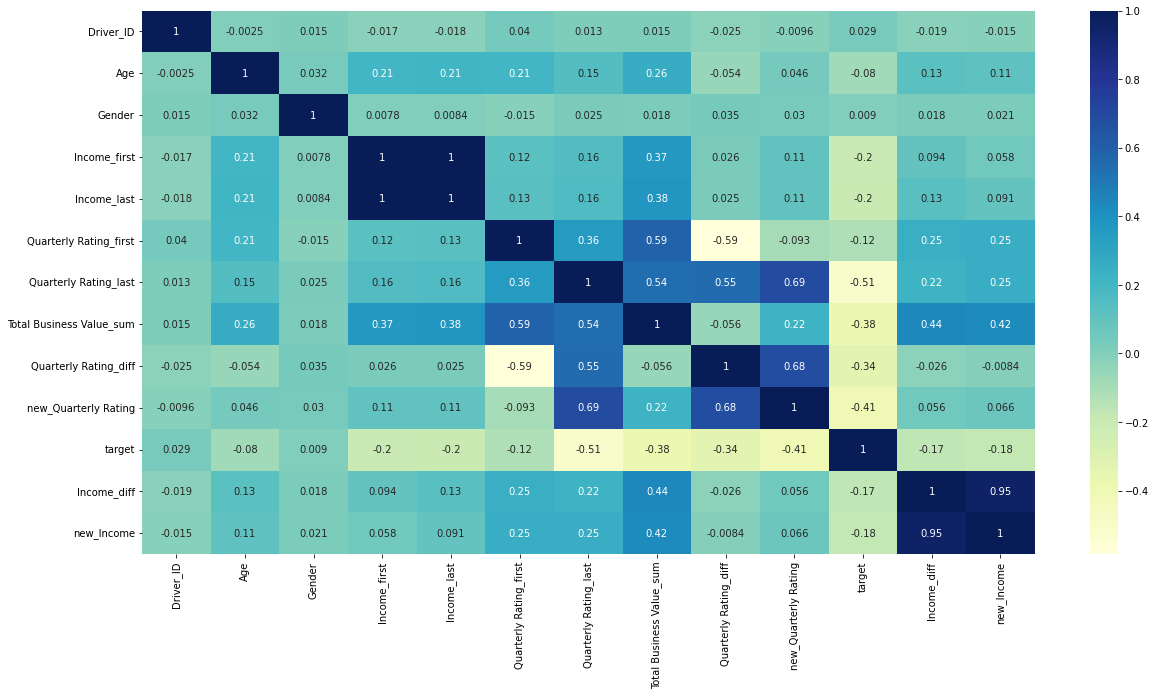

In [ ]:
plt.figure(figsize=(20,10))                              
ax = sns.heatmap(df_new.corr(), cmap="YlGnBu", annot=True)

# **One-Hot Encoding**

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Driver_ID                 2381 non-null   float64       
 1   Age                       2381 non-null   float64       
 2   Gender                    2381 non-null   float64       
 3   Education_Level           2381 non-null   category      
 4   City                      2381 non-null   object        
 5   Dateofjoining             2381 non-null   datetime64[ns]
 6   Joining Designation       2381 non-null   category      
 7   Grade                     2381 non-null   category      
 8   MMM-YY                    2381 non-null   datetime64[ns]
 9   Income_first              2381 non-null   float64       
 10  Income_last               2381 non-null   float64       
 11  Quarterly Rating_first    2381 non-null   int64         
 12  Quarterly Rating_las

In [ ]:
df_new.nunique()

Driver_ID                   2381
Age                           42
Gender                         5
Education_Level                3
City                          29
Dateofjoining                869
Joining Designation            5
Grade                          5
MMM-YY                        24
Income_first                2339
Income_last                 2339
Quarterly Rating_first         4
Quarterly Rating_last          4
Total Business Value_sum    1629
LastWorkingDate              494
Quarterly Rating_diff          7
new_Quarterly Rating           2
target                         2
Income_diff                   44
new_Income                     2
dtype: int64

In [ ]:
x = df_new[[ "City" ,"Education_Level" , "Grade", "Joining Designation"]]
x

,City,Education_Level,Grade,Joining Designation
0,C23,2,1,1
1,C7,2,2,2
2,C13,2,2,2
3,C9,0,1,1
4,C11,1,3,3
...,...,...,...,...
2376,C24,0,3,2
2377,C9,0,1,1
2378,C19,0,2,2
2379,C20,2,1,1


In [ ]:
df_cat = pd.get_dummies(x)

In [ ]:
df_cat.head()

,City_C1,City_C10,City_C11,City_C12,City_C13,City_C14,City_C15,City_C16,City_C17,City_C18,...,Grade_1,Grade_2,Grade_3,Grade_4,Grade_5,Joining Designation_1,Joining Designation_2,Joining Designation_3,Joining Designation_4,Joining Designation_5
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
df_num= df_new.select_dtypes(include=["int64","float64"])
df_num = df_num.drop("target", axis=1)
df_num.head()

,Driver_ID,Age,Gender,Income_first,Income_last,Quarterly Rating_first,Quarterly Rating_last,Total Business Value_sum,Quarterly Rating_diff,new_Quarterly Rating,Income_diff,new_Income
0,1.0,28.0,0.0,57387.0,57387.0,2,2,1715580.0,0,0,0.0,0
1,2.0,31.0,0.0,67016.0,67016.0,1,1,0.0,0,0,0.0,0
2,4.0,43.0,0.0,65603.0,65603.0,1,1,350000.0,0,0,0.0,0
3,5.0,29.0,0.0,46368.0,46368.0,1,1,120360.0,0,0,0.0,0
4,6.0,31.0,1.0,78728.0,78728.0,1,2,1265000.0,1,1,0.0,0


In [ ]:
df_final = pd.concat([df_num, df_cat_dum], axis=1)
df_final.head()

,Driver_ID,Age,Gender,Income_first,Income_last,Quarterly Rating_first,Quarterly Rating_last,Total Business Value_sum,Quarterly Rating_diff,new_Quarterly Rating,...,Grade_1,Grade_2,Grade_3,Grade_4,Grade_5,Joining Designation_1,Joining Designation_2,Joining Designation_3,Joining Designation_4,Joining Designation_5
0,1.0,28.0,0.0,57387.0,57387.0,2,2,1715580.0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,2.0,31.0,0.0,67016.0,67016.0,1,1,0.0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,4.0,43.0,0.0,65603.0,65603.0,1,1,350000.0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,5.0,29.0,0.0,46368.0,46368.0,1,1,120360.0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,6.0,31.0,1.0,78728.0,78728.0,1,2,1265000.0,1,1,...,0,0,1,0,0,0,0,1,0,0


# **Class Imbalance Treatment**

In [ ]:
df_new['target'].value_counts()  # data is imbalance 

1    1616
0     765
Name: target, dtype: int64

In [ ]:
x = df_final                         # initialization of data X:- all features except target
y = df_new['target']                  # y:- contain only target variable (0: churn, 1: retain)

In [ ]:
# Train, CV, test split
from sklearn.model_selection import train_test_split
#0.6, 0.2, 0.2 split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42, shuffle = True)

print(f"Sizes of the sets created are:\nTraining set:{x_train.shape[0]}\nTest set:{x_test.shape[0]}")

Sizes of the sets created are:
Training set:1904
Test set:477


Balancing the data by using **SMOTE (Synthetic Minority Oversampling Technique)**

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
smt = SMOTE()
X_sm, y_sm = smt.fit_resample(x_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({0: 1289, 1: 1289})


With the help of smote techanique we make class imbalance to balance with 0 and 1 both with 1289 data points

# **Standardization**

In [ ]:
df_num= df_new.select_dtypes(include=["int64","float64"])
df_num

,Driver_ID,Age,Gender,Income_first,Income_last,Quarterly Rating_first,Quarterly Rating_last,Total Business Value_sum,Quarterly Rating_diff,new_Quarterly Rating,target,Income_diff,new_Income
0,1.0,28.0,0.0,57387.0,57387.0,2,2,1715580.0,0,0,1,0.0,0
1,2.0,31.0,0.0,67016.0,67016.0,1,1,0.0,0,0,0,0.0,0
2,4.0,43.0,0.0,65603.0,65603.0,1,1,350000.0,0,0,1,0.0,0
3,5.0,29.0,0.0,46368.0,46368.0,1,1,120360.0,0,0,1,0.0,0
4,6.0,31.0,1.0,78728.0,78728.0,1,2,1265000.0,1,1,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784.0,34.0,0.0,82815.0,82815.0,3,4,21748820.0,1,1,0,0.0,0
2377,2785.0,34.0,1.0,12105.0,12105.0,1,1,0.0,0,0,1,0.0,0
2378,2786.0,45.0,0.0,35370.0,35370.0,2,1,2815090.0,-1,0,1,0.0,0
2379,2787.0,28.0,1.0,69498.0,69498.0,2,1,977830.0,-1,0,1,0.0,0


In [ ]:
df_num = df_num.drop("target", axis=1)
df_num.head()

,Driver_ID,Age,Gender,Income_first,Income_last,Quarterly Rating_first,Quarterly Rating_last,Total Business Value_sum,Quarterly Rating_diff,new_Quarterly Rating,Income_diff,new_Income
0,1.0,28.0,0.0,57387.0,57387.0,2,2,1715580.0,0,0,0.0,0
1,2.0,31.0,0.0,67016.0,67016.0,1,1,0.0,0,0,0.0,0
2,4.0,43.0,0.0,65603.0,65603.0,1,1,350000.0,0,0,0.0,0
3,5.0,29.0,0.0,46368.0,46368.0,1,1,120360.0,0,0,0.0,0
4,6.0,31.0,1.0,78728.0,78728.0,1,2,1265000.0,1,1,0.0,0


In [ ]:
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df_num)

In [ ]:
df_scaler = pd.DataFrame(df_scaler, columns=df_num.columns, index = df_num.index)
df_scaler.head()

,Driver_ID,Age,Gender,Income_first,Income_last,Quarterly Rating_first,Quarterly Rating_last,Total Business Value_sum,Quarterly Rating_diff,new_Quarterly Rating,Income_diff,new_Income
0,-1.732720,-0.950287,-0.835783,-0.064452,-0.068616,0.615759,0.706497,-0.314641,0.062537,-0.420672,-0.12919,-0.135616
1,-1.731479,-0.448015,-0.835783,0.276157,0.270700,-0.583033,-0.528576,-0.502646,0.062537,-0.420672,-0.12919,-0.135616
2,-1.728998,1.561071,-0.835783,0.226174,0.220907,-0.583033,-0.528576,-0.464290,0.062537,-0.420672,-0.12919,-0.135616
3,-1.727757,-0.782863,-0.835783,-0.454230,-0.456914,-0.583033,-0.528576,-0.489456,0.062537,-0.420672,-0.12919,-0.135616
4,-1.726516,-0.448015,1.199814,0.690448,0.683418,-0.583033,0.706497,-0.364019,1.133767,2.377149,-0.12919,-0.135616


In [ ]:
df_finals = pd.concat([df_scaler, df_cat], axis=1)
df_finals

,Driver_ID,Age,Gender,Income_first,Income_last,Quarterly Rating_first,Quarterly Rating_last,Total Business Value_sum,Quarterly Rating_diff,new_Quarterly Rating,...,Grade_1,Grade_2,Grade_3,Grade_4,Grade_5,Joining Designation_1,Joining Designation_2,Joining Designation_3,Joining Designation_4,Joining Designation_5
0,-1.732720,-0.950287,-0.835783,-0.064452,-0.068616,0.615759,0.706497,-0.314641,0.062537,-0.420672,...,1,0,0,0,0,1,0,0,0,0
1,-1.731479,-0.448015,-0.835783,0.276157,0.270700,-0.583033,-0.528576,-0.502646,0.062537,-0.420672,...,0,1,0,0,0,0,1,0,0,0
2,-1.728998,1.561071,-0.835783,0.226174,0.220907,-0.583033,-0.528576,-0.464290,0.062537,-0.420672,...,0,1,0,0,0,0,1,0,0,0
3,-1.727757,-0.782863,-0.835783,-0.454230,-0.456914,-0.583033,-0.528576,-0.489456,0.062537,-0.420672,...,1,0,0,0,0,1,0,0,0,0
4,-1.726516,-0.448015,1.199814,0.690448,0.683418,-0.583033,0.706497,-0.364019,1.133767,2.377149,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,1.720167,0.054256,-0.835783,0.835018,0.827440,1.814551,3.176643,1.880735,1.133767,2.377149,...,0,0,1,0,0,0,1,0,0,0
2377,1.721407,0.054256,1.199814,-1.666223,-1.664305,-0.583033,-0.528576,-0.502646,0.062537,-0.420672,...,1,0,0,0,0,1,0,0,0,0
2378,1.722648,1.895919,-0.835783,-0.843265,-0.844471,0.615759,-0.528576,-0.194149,-1.008693,-0.420672,...,0,1,0,0,0,0,1,0,0,0
2379,1.723889,-0.950287,1.199814,0.363953,0.358163,0.615759,-0.528576,-0.395489,-1.008693,-0.420672,...,1,0,0,0,0,1,0,0,0,0


# **Bagging Algorithm**

## ***RandomForestEstimator***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate

tree_clf = RandomForestClassifier(random_state=7, max_depth=7, n_estimators=1000)
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(tree_clf, X_sm, y_sm, cv = kfold, scoring = 'accuracy', return_train_score = True)

print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
print(f"K-Fold Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")

K-Fold Accuracy Mean: Train: 85.79450927810545 Validation: 80.87850269960487
K-Fold Accuracy Std: Train: 1.165740735019476 Validation: 3.0668414499625145


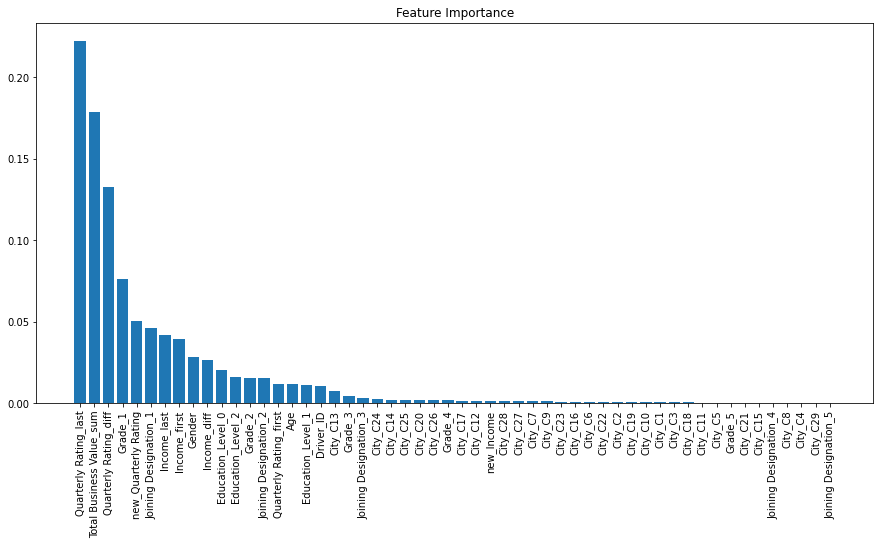

In [ ]:
# Feature importance

clf = RandomForestClassifier(random_state=7, max_depth=4, n_estimators=100)
clf.fit(X_sm, y_sm)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_sm.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_sm.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_sm.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [ ]:
#Tring random forest model with different parameters
# Defining Parametes
params = {
          'n_estimators' : [100,200,300,400],
          'max_depth' : [3,5,10],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [8,9,10]
         }

In [ ]:
from sklearn.model_selection import GridSearchCV

tuning_function = GridSearchCV(estimator = RandomForestClassifier(), 
                               param_grid = params,
                               scoring = 'accuracy',
                               cv = 3,
                               n_jobs=-1
                               )

In [ ]:
# Now we will fit all combinations, Take final result or model accuracy.
tuning_function.fit(X_sm, y_sm)

parameters = tuning_function.best_params_
score = tuning_function.best_score_
print(parameters)
print(score)  

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 10, 'n_estimators': 300}
0.8289587676313723


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate

tree_clf = RandomForestClassifier(random_state=7, max_depth=10, n_estimators=300)
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(tree_clf, X_sm, y_sm, cv = kfold, scoring = 'accuracy', return_train_score = True)

print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
print(f"K-Fold Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")

K-Fold Accuracy Mean: Train: 91.15605453951179 Validation: 83.36560793894972
K-Fold Accuracy Std: Train: 0.79177546125324 Validation: 5.25159499414844


## **Results Evaluation On Bagging Method**

### **Classification Report (Confusion Matrix etc)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_sm, y_sm)

RandomForestClassifier()

In [ ]:
print(f"Model Accuracy Score : \nTraining accuracy:{rf.score(X_sm, y_sm)}\nTest Accuracy: {rf.score(x_test, y_test)}")

Model Accuracy Score : 
Training accuracy:1.0
Test Accuracy: 0.7819706498951782


In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

array([[ 91,  59],
       [ 45, 282]])

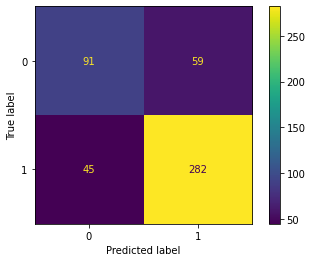

In [ ]:
ConfusionMatrixDisplay(conf_matrix).plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.61      0.64       150
           1       0.83      0.86      0.84       327

    accuracy                           0.78       477
   macro avg       0.75      0.73      0.74       477
weighted avg       0.78      0.78      0.78       477



### **ROC AUC Curve & comments**

In [ ]:
fpr, tpr, thr = roc_curve(y_test, y_pred)

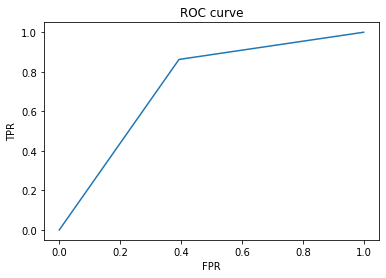

In [ ]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)  # area under the curve is 0.8080 which is good 

0.7345259938837921

# **Boosting Algorithm**

## **Xgboost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

import datetime as dt

params = {
        'learning_rate': [0.1, 0.5, 0.8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb = XGBClassifier(n_estimators=100, objective='multi:softmax', num_class=20, silent=True, n_jobs=8)

In [ ]:
folds = 3

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=10, scoring='accuracy', n_jobs=4, cv=skf.split(X_sm, y_sm), verbose=3, random_state=1001 )


start = dt.datetime.now()
random_search.fit(X_sm, y_sm)
end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best hyperparameters:
{'subsample': 0.6, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [ ]:
best_xgb = XGBClassifier(n_estimators=100, objective='multi:softmax', num_class=20, subsample=0.8, max_depth=5, learning_rate=0.5, colsample_bytree=1.0, silent=True)
best_xgb.fit(X_sm, y_sm)

XGBClassifier(colsample_bytree=1.0, learning_rate=0.5, max_depth=5,
              num_class=20, objective='multi:softmax', silent=True,
              subsample=0.8)

In [ ]:
print(f"Model Accuracy Score : \nTraining accuracy:{best_xgb.score(X_sm, y_sm)}\nTest Accuracy: {best_xgb.score(x_test, y_test)}")

Model Accuracy Score : 
Training accuracy:1.0
Test Accuracy: 0.7924528301886793


[0.00368326 0.00388656 0.00864132 0.00527204 0.00327829 0.01216013
 0.21894129 0.00673828 0.00494761 0.00671422 0.00450385 0.
 0.00330421 0.00623199 0.00352741 0.00569304 0.00916817 0.00587284
 0.00310238 0.00340508 0.00455249 0.00488189 0.00404748 0.00426617
 0.00322411 0.0039789  0.00384431 0.00348836 0.00609584 0.00424365
 0.0053884  0.00553159 0.00739069 0.00471848 0.0042945  0.00308718
 0.00338464 0.00411427 0.00632736 0.00398342 0.00676849 0.01152855
 0.00609798 0.00586521 0.02443553 0.01365372 0.00565336 0.00850302
 0.         0.15142001 0.08567488 0.09947115 0.14387867 0.02713377]


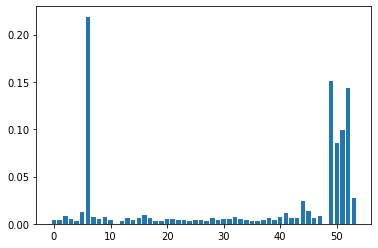

In [ ]:
print(best_xgb.feature_importances_)

plt.bar(range(len(best_xgb.feature_importances_)), best_xgb.feature_importances_)
plt.show()

## **Results Evaluation On Boosting Method:-**









### **Classification Report (Confusion Matrix etc)**

In [ ]:
y_pred=best_xgb.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

array([[ 86,  64],
       [ 35, 292]])

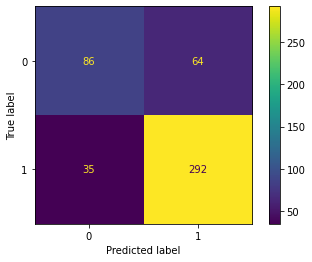

In [ ]:
ConfusionMatrixDisplay(conf_matrix).plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.57      0.63       150
           1       0.82      0.89      0.86       327

    accuracy                           0.79       477
   macro avg       0.77      0.73      0.74       477
weighted avg       0.79      0.79      0.79       477



### **ROC AUC Curve & comments**

In [ ]:
fpr, tpr, thr = roc_curve(y_test, y_pred)

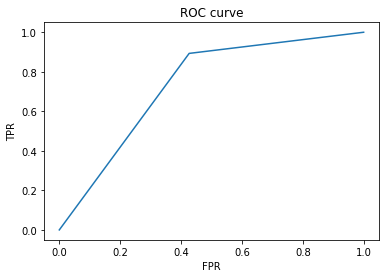

In [ ]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)  # area under the curve is 0.8041 which is good 

0.7331498470948012

# **Boosting Algorithm**

## **Gradient Boosting Decision Trees**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Define Gradient Boosting Classifier with hyperparameters
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )
# Fit train data to GBC
gbc.fit(X_sm, y_sm)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [ ]:
print(f"Model Accuracy Score : \nTraining accuracy:{gbc.score(X_sm, y_sm)}\nTest Accuracy: {gbc.score(x_test, y_test)}")

Model Accuracy Score : 
Training accuracy:0.8925523661753297
Test Accuracy: 0.8092243186582809


[0.02011163 0.02348459 0.05522926 0.03637325 0.0268294  0.01352382
 0.16719662 0.14735775 0.09598828 0.03086867 0.01353577 0.00144543
 0.0008103  0.00305965 0.00058947 0.00498518 0.01086815 0.0048891
 0.00272136 0.00128247 0.00165506 0.0029468  0.00064006 0.0037944
 0.00375203 0.00137353 0.0014283  0.00518837 0.004135   0.00373705
 0.00561801 0.00517259 0.00393204 0.00143237 0.00211856 0.00111394
 0.00090927 0.0028028  0.00340265 0.00033485 0.00297879 0.0338793
 0.0331895  0.03452129 0.04923719 0.02518538 0.00974409 0.0074708
 0.00132391 0.06404447 0.01636762 0.00232226 0.00152296 0.00157463]


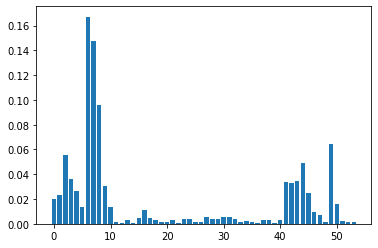

In [ ]:
print(gbc.feature_importances_)

plt.bar(range(len(gbc.feature_importances_)), gbc.feature_importances_)
plt.show()

## **Results Evaluation On Boosting Method:-**

### **Classification Report (Confusion Matrix etc)**

In [ ]:
y_pred=gbc.predict(x_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

array([[ 83,  67],
       [ 24, 303]])

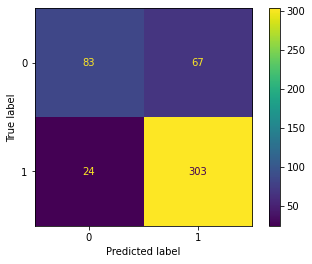

In [ ]:
ConfusionMatrixDisplay(conf_matrix).plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.55      0.65       150
           1       0.82      0.93      0.87       327

    accuracy                           0.81       477
   macro avg       0.80      0.74      0.76       477
weighted avg       0.81      0.81      0.80       477



### **ROC AUC Curve & comments**

In [ ]:
fpr, tpr, thr = roc_curve(y_test, y_pred)

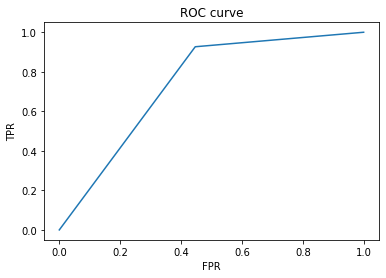

In [ ]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)  # area under the curve is 0.8113 which is good 

0.7399694189602446

# **Boosting Algorithm**

## **Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
adaboost_clf.fit(X_sm, y_sm)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
print(f"Model Accuracy Score : \nTraining accuracy:{adaboost_clf.score(X_sm, y_sm)}\nTest Accuracy: {adaboost_clf.score(x_test, y_test)}")

Model Accuracy Score : 
Training accuracy:0.8560899922420481
Test Accuracy: 0.7840670859538784


## **Results Evaluation On Boosting Method:-**

### **Classification Report (Confusion Matrix etc)**

In [ ]:
y_pred=gbc.predict(x_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

array([[ 83,  67],
       [ 24, 303]])

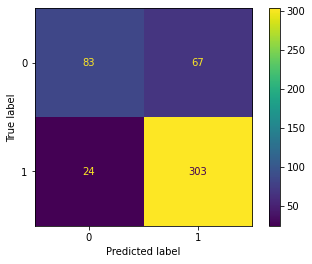

In [ ]:
ConfusionMatrixDisplay(conf_matrix).plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.55      0.65       150
           1       0.82      0.93      0.87       327

    accuracy                           0.81       477
   macro avg       0.80      0.74      0.76       477
weighted avg       0.81      0.81      0.80       477



### **ROC AUC Curve & comments**

In [ ]:
fpr, tpr, thr = roc_curve(y_test, y_pred)

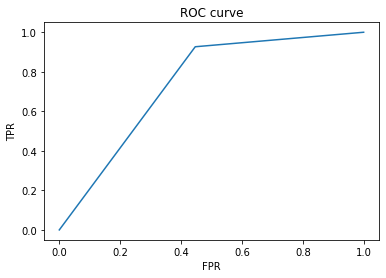

In [ ]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)  # area under the curve is 0.8113 which is good 

0.7399694189602446

# ***For Ensemble Learning we build 1 model on Bagging and 3 model on boosting . let's check there train and test accuracy, precision, recall ans AUC-ROC score:***

## **1] Random forest estimator bagging technique**

*   Train data Accuracy:- 1.0
*   Test data Accuracy:- 0.7799

*   Precision Score for retain drivers:-0.82 
*   Recall score for retain driver:-0.87

*   F1 score for retain drver:-0.84
*   ROC-AUC Score:- 0.729

## **2] Xgboost boosting technique**

*   Train data Accuracy:- 1.0
*   Test data Accuracy:- 0.784

*   Precision Score for retain drivers:-0.81
*   Recall score for retain driver:-0.90

*   F1 score for retain drver:-0.85
*   ROC-AUC Score:- 0.7162

## **3] Gradient Boosting Decision Tree** 

*   Train data Accuracy:- 0.893
*   Test data Accuracy:- 0.8029

*   Precision Score for retain drivers:-0.82
*   Recall score for retain driver:-0.92

*   F1 score for retain drver:-0.86
*   ROC-AUC Score:- 0.733


## **4] Adaboost**

*   Train data Accuracy:- 0.858
*   Test data Accuracy:- 0.784

*   Precision Score for retain drivers:-0.82
*   Recall score for retain driver:-0.92

*   F1 score for retain drver:-0.86
*   ROC-AUC Score:- 0.734


## **The AdaBoost model gives a genuine result as the train data and test data accuracy has very less difference which indicates the good sign of model building. And Adaboost gives precision 82% and recall 92% with f1_score as 86% which is good enough to tell us about the good accuracy.**

# **Actionable Insights & Recommendations:-**

1.   With Adaboosting model we will get to know how many drivers will going to churn in advance with the help of this informaton company can take some action to retain those drivers those are looking for churning.
2.  Maximum driver belong to age limit 28-32 years old so, ola company can provide some offers like helthinsurance and many other options to protect from churning.

1.   In ola 58% are male drivers and 42% approx are female drivers so they can rum campain to maintain this ratio and do marking to incrase the female driver count.
2.   From 2013 to 2018 company driver count was only increasing but from 2019 churning get started. maximum driver jon in month of may,june and july in 2018 so, from this we can say drive use to join company usally in summer sesions.

1.   Ola driver can work on to increase their quarterly rating. because quarterly rating is directly praportional with monthly income and total_business_value.
2.   City C5 driver income is more as compaire to other city drivers income so ola can increase their cab service more in city C5.

1.   Driver count is more in city C20 it means ola service more active in this city so, they can maintain this count and try to increase the cab service as it shows it's most demanding city for ola cab service. 
2.   Maximum driver are churning from city C20 and C22 and maximum driver retain are from city C20 and C15.

1.   There is no correation between age and income so we can see almost all age group driver earning approx same monthly income.
2.   To increase the ola business driver has to increase their rating. and to increase the rating driver should provide a good service so for this ola can give traning such as softskill and some driving skills to improve the rating which is going to impact the total_business_value growing.












